In [139]:
%run setup.ipynb

In [140]:
gmap

{'2R': array([2.00000000e-06, 4.00000000e-06, 6.00000000e-06, ...,
        1.19249717e+02, 1.19249717e+02, 1.19249718e+02]),
 '2L': array([5.00000000e-07, 1.00000000e-06, 1.50000000e-06, ...,
        9.34037749e+01, 9.34037769e+01, 9.34037789e+01]),
 '3R': array([2.00000000e-06, 4.00000000e-06, 6.00000000e-06, ...,
        1.00535992e+02, 1.00535992e+02, 1.00535993e+02]),
 '3L': array([5.00000000e-07, 1.00000000e-06, 1.50000000e-06, ...,
        8.00537175e+01, 8.00537195e+01, 8.00537215e+01]),
 'X': array([2.00000000e-06, 4.00000000e-06, 6.00000000e-06, ...,
        4.22111975e+01, 4.22111980e+01, 4.22111985e+01]),
 '2': array([2.00000000e-06, 4.00000000e-06, 6.00000000e-06, ...,
        2.12653493e+02, 2.12653495e+02, 2.12653497e+02]),
 '3': array([2.00000000e-06, 4.00000000e-06, 6.00000000e-06, ...,
        1.80589710e+02, 1.80589712e+02, 1.80589714e+02])}

In [117]:
def mbp2cm(chromosome, pos):
    """Convert physical distance in Mbp to genetic distance in cM."""
    return bp2cm(chromosome, pos*1e6)


def bp2cm(chromosome, pos):
    """Convert physical distance in bp to genetic distance in cM."""
    return gmap[chromosome][int(pos) - 1]


In [198]:
def plot_h12(pop, chromosome, center, flank, ymax=1, ax=None, step=1, shift=0, 
             markersize=4, legend=False, genetic_distance=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 2), facecolor='w')
        
    # plot center line
    if genetic_distance:
        gcenter = mbp2cm(chromosome, center)
        ax.axvline(gcenter, color='w', linestyle='-', lw=4, zorder=0)
    else:
        ax.axvline(center, color='w', linestyle='-', lw=4, zorder=0)
        
    # figure out x limits
    if isinstance(flank, (int, float)):
        xlim = center - flank, center + flank
    elif isinstance(flank, tuple):
        xlim = center - flank[0], center + flank[1]
        
    # set color palette
    palette = sns.color_palette("Blues_d", 3)[::-1]
    
    # load gwss data
    windows, gwindows, h1, h12, h123, h2_h1 = load_h12_gwss(pop, chromosome)
    
    # plot data
    if genetic_distance:
        x = gwindows.mean(axis=1)
        xlim = mbp2cm(chromosome, xlim[0]), mbp2cm(chromosome, xlim[1])
    else:
        x = windows.mean(axis=1) / 1e6
    ax.plot(x[shift::step], h123[shift::step], linestyle=' ', marker='o', color=palette[0], markersize=markersize, label='H123')
    ax.plot(x[shift::step], h12[shift::step], linestyle=' ', marker='o', color=palette[1], markersize=markersize, label='H12')
    ax.plot(x[shift::step], h1[shift::step], linestyle=' ', marker='o', color=palette[2], markersize=markersize, label='H1')

    # tidy plot
    ax.set_xlim(*xlim)
    ax.set_ylim(0, ymax)
    ax.set_ylabel('$H12$')
    pop_label = (
        pop_defs[pop]["label"]
        .replace('An. gambiae', '$An. gambiae$')
        .replace('An. coluzzii', '$An. coluzzii$')
    )
    ax.annotate(pop_label, xy=(0, 1), xycoords='axes fraction',
                xytext=(3, -3), textcoords='offset points', 
                fontsize=8, ha='left', va='top')
    if legend:
        lgd = ax.legend(bbox_to_anchor=(1, 1), loc='upper left', facecolor='w', edgecolor='w')
        for handle in lgd.legendHandles:
            handle._legmarker.set_markersize(6)
    

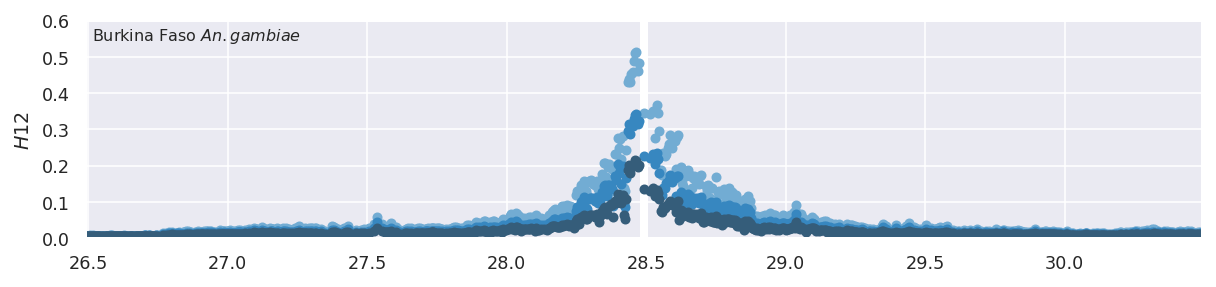

In [199]:
plot_h12('bf_gam', cyp6p3.chromosome, cyp6p3.chromosome_center/1e6, flank=2, 
         ymax=.6, step=5, shift=3)

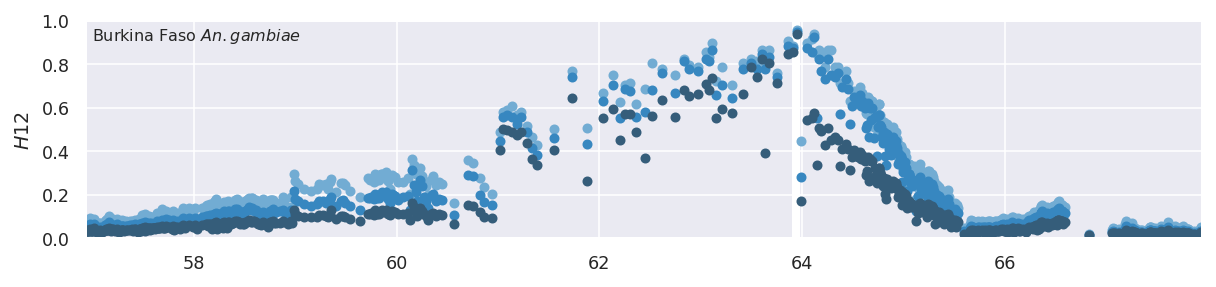

In [200]:
plot_h12('bf_gam', vgsc.chromosome, vgsc.chromosome_center/1e6, 
         flank=(7, 4), ymax=1, step=5, shift=0)

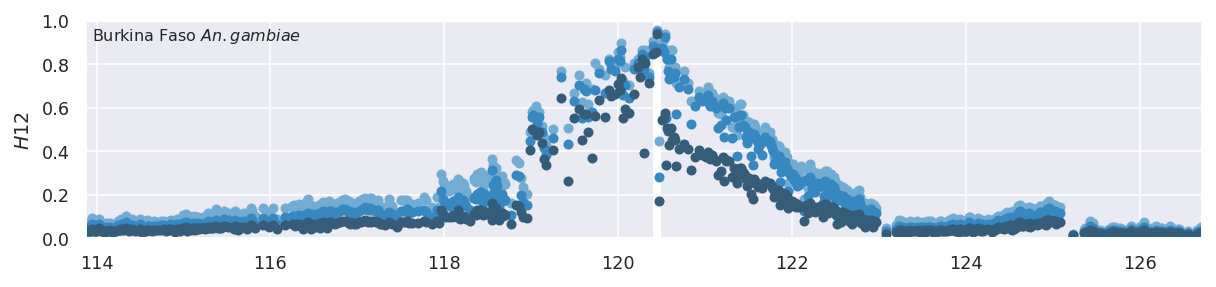

In [201]:
plot_h12('bf_gam', vgsc.chromosome, vgsc.chromosome_center/1e6, 
         flank=(7, 4), ymax=1, step=5, shift=0, genetic_distance=True)

In [202]:
def plot_ihs(pop, chromosome, center, flank, ax=None, markersize=4, 
             window_size=200, window_step=100, step=2, shift=0, 
             legend=False, label=True, ymax=10, genetic_distance=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 2), facecolor='w')
        
    # plot center line
    if genetic_distance:
        gcenter = mbp2cm(chromosome, center)
        ax.axvline(gcenter, color='w', linestyle='-', lw=4, zorder=0)
    else:
        ax.axvline(center, color='w', linestyle='-', lw=4, zorder=0)
        
    # figure out x limits
    if isinstance(flank, (int, float)):
        xlim = center - flank, center + flank
    elif isinstance(flank, tuple):
        xlim = center - flank[0], center + flank[1]
    else:
        raise ValueError

    # create colour palette
    palette = sns.color_palette("Reds_d", 4)[::-1]
    
    # load gwss data
    p, gp, y_max, y_pc95, y_pc75, y_pc50 = load_ihs_gwss(pop, chromosome, window_size=window_size, window_step=window_step)

    # plot gwss data
    if genetic_distance:
        x = gp
        xlim = mbp2cm(chromosome, xlim[0]), mbp2cm(chromosome, xlim[1])
    else:
        x = p/1e6
    ax.plot(x[shift::step], y_max.clip(0, 10)[shift::step], marker='o', linestyle=' ', markersize=markersize, color=palette[0], label='$P_{100}$')
    ax.plot(x[shift::step], y_pc95.clip(0, 10)[shift::step], marker='o', linestyle=' ', markersize=markersize, color=palette[1], label='$P_{95}$')
    ax.plot(x[shift::step], y_pc75.clip(0, 10)[shift::step], marker='o', linestyle=' ', markersize=markersize, color=palette[2], label='$P_{75}$')
    ax.plot(x[shift::step], y_pc50.clip(0, 10)[shift::step], marker='o', linestyle=' ', markersize=markersize, color=palette[3], label='$P_{50}$')

    # tidy plot
    ax.set_xlim(*xlim)
    ax.set_ylim(0, ymax)
    ax.set_ylabel('$|iHS|$')
    if legend:
        lgd = ax.legend(bbox_to_anchor=(1, 1), loc='upper left', facecolor='w', edgecolor='w')
        for handle in lgd.legendHandles:
            handle._legmarker.set_markersize(6)
    if label:
        pop_label = (
            pop_defs[pop]['label']
            .replace("An. gambiae", "$An. gambiae$")
            .replace("An. coluzzii", "$An. coluzzii$")
        )
        ax.annotate(pop_label, xy=(0, 1), xytext=(3, -3), 
                    xycoords='axes fraction', textcoords='offset points', 
                    fontsize=8, va='top', ha='left')
    

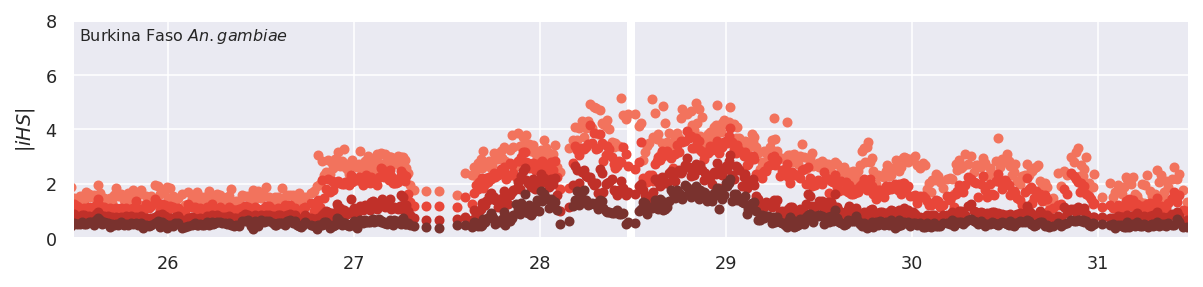

In [203]:
plot_ihs('bf_gam', cyp6p3.chromosome, cyp6p3.chromosome_center/1e6, flank=3, ymax=8)

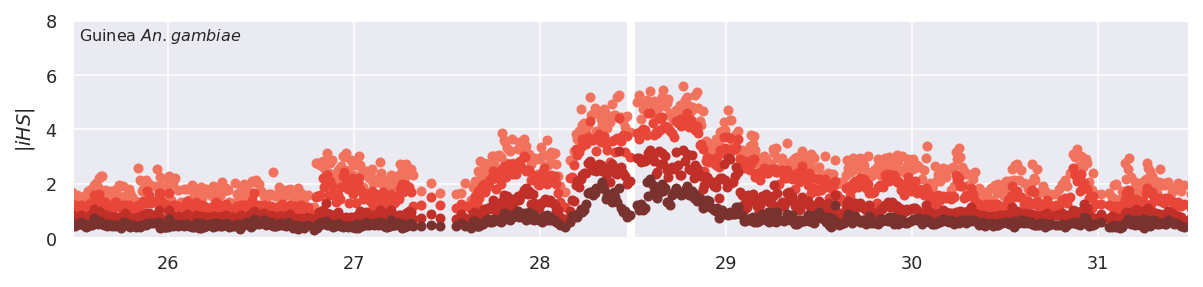

In [204]:
plot_ihs('gn_gam', cyp6p3.chromosome, cyp6p3.chromosome_center/1e6, flank=3, ymax=8)

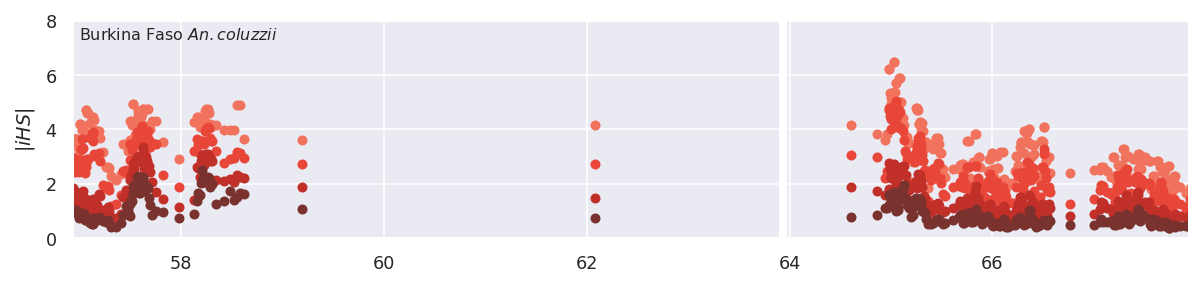

In [205]:
plot_ihs('bf_col', vgsc.chromosome, vgsc.chromosome_center/1e6, 
         flank=(7, 4), ymax=8, step=1, shift=0)

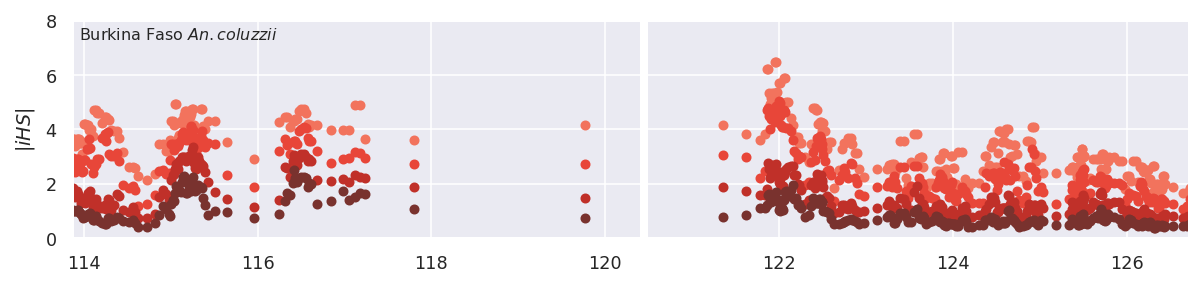

In [206]:
plot_ihs('bf_col', vgsc.chromosome, vgsc.chromosome_center/1e6, 
         flank=(7, 4), ymax=8, step=1, shift=0, genetic_distance=True)

In [207]:
def plot_xpehh(pop1, pop2, chromosome, center, flank, ax=None, markersize=4, 
               window_size=500, window_step=250, step=1, shift=0, 
               legend=False, label=True, ymax=6, genetic_distance=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 2), facecolor='w')

    # plot center line
    if genetic_distance:
        gcenter = mbp2cm(chromosome, center)
        ax.axvline(gcenter, color='w', linestyle='-', lw=4, zorder=0)
    else:
        ax.axvline(center, color='w', linestyle='-', lw=4, zorder=0)
        
    # figure out x limits
    if isinstance(flank, (int, float)):
        xlim = center - flank, center + flank
    elif isinstance(flank, tuple):
        xlim = center - flank[0], center + flank[1]
    else:
        raise ValueError

    # create colour palette
    palette = sns.color_palette("Greens_d", 4)[::-1]

    # load gwss data
    p, gp, y_max, y_pc95, y_pc75, y_pc50 = load_xpehh_gwss(pop1, pop2, chromosome, window_size=window_size, window_step=window_step)

    # plot
    if genetic_distance:
        x = gp
        xlim = mbp2cm(chromosome, xlim[0]), mbp2cm(chromosome, xlim[1])
    else:
        x = p/1e6
    ax.plot(x[shift::step], y_max.clip(0, 6)[shift::step], marker='o', linestyle=' ', markersize=markersize, color=palette[0], label='$P_{100}$')
    ax.plot(x[shift::step], y_pc95.clip(0, 6)[shift::step], marker='o', linestyle=' ', markersize=markersize, color=palette[1], label='$P_{95}$')
    ax.plot(x[shift::step], y_pc75.clip(0, 6)[shift::step], marker='o', linestyle=' ', markersize=markersize, color=palette[2], label='$P_{75}$')
    ax.plot(x[shift::step], y_pc50.clip(0, 6)[shift::step], marker='o', linestyle=' ', markersize=markersize, color=palette[3], label='$P_{50}$')

    # tidy
    ax.set_xlim(*xlim)
    ax.set_ylim(0, ymax)
    ax.set_ylabel('$XP-EHH$')
    if legend:
        lgd = ax.legend(bbox_to_anchor=(1, 1), loc='upper left', facecolor='w', edgecolor='w')
        for handle in lgd.legendHandles:
            handle._legmarker.set_markersize(6)
    if label:
        pops_label = (
            f"{pop_defs[pop1]['label']} vs {pop_defs[pop2]['label']}"
            .replace("An. gambiae", "$An. gambiae$")
            .replace("An. coluzzii", "$An. coluzzii$")
        )
        ax.annotate(pops_label, xy=(0, 1), xytext=(3, -3), 
                    xycoords='axes fraction', textcoords='offset points', 
                    fontsize=8, va='top', ha='left')
    

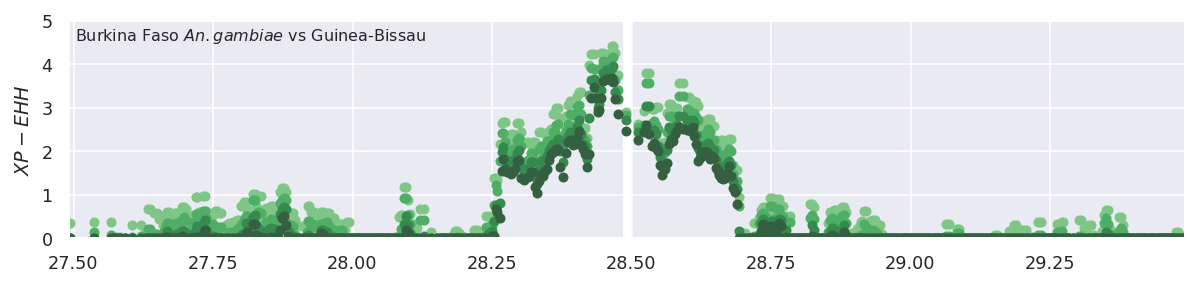

In [208]:
plot_xpehh('bf_gam', 'gw', cyp6p3.chromosome, cyp6p3.chromosome_center/1e6, 1,
           step=1, shift=0, ymax=5)

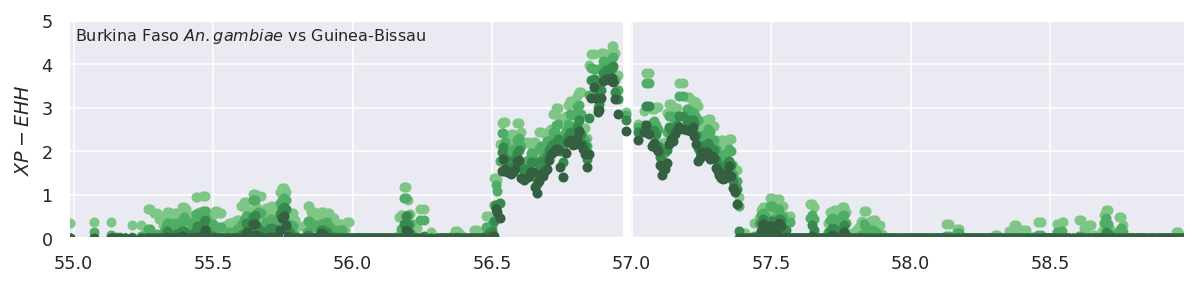

In [209]:
plot_xpehh('bf_gam', 'gw', cyp6p3.chromosome, cyp6p3.chromosome_center/1e6, 1,
           step=1, shift=0, ymax=5, genetic_distance=True)

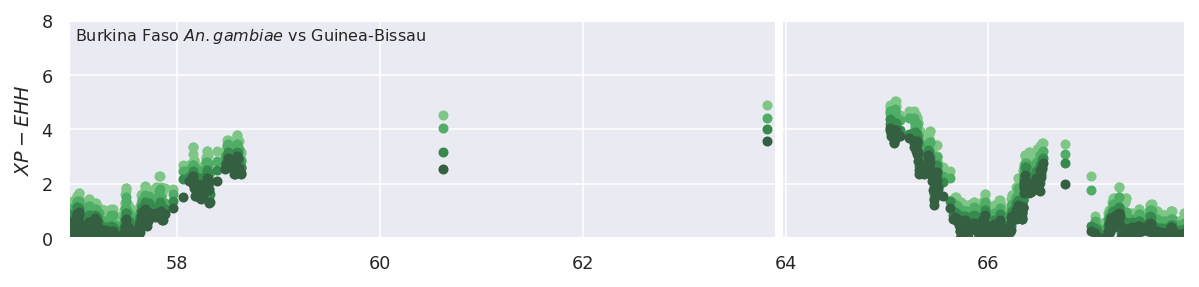

In [210]:
plot_xpehh('bf_gam', 'gw', vgsc.chromosome, vgsc.chromosome_center/1e6, 
         flank=(7, 4), ymax=8, step=1, shift=0)

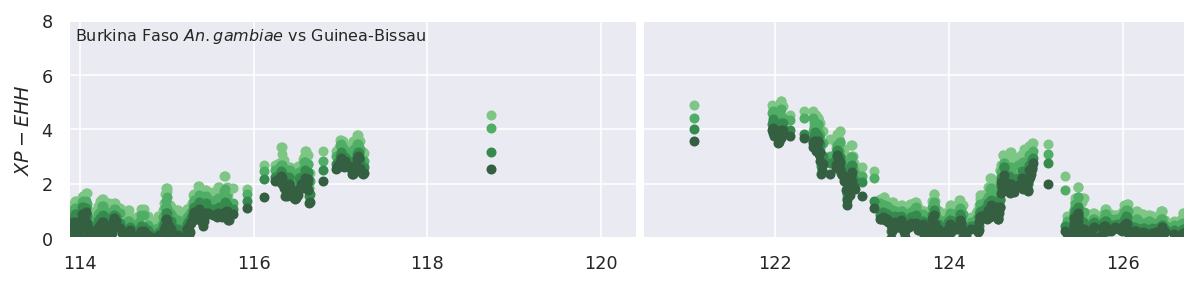

In [211]:
plot_xpehh('bf_gam', 'gw', vgsc.chromosome, vgsc.chromosome_center/1e6, 
         flank=(7, 4), ymax=8, step=1, shift=0, genetic_distance=True)

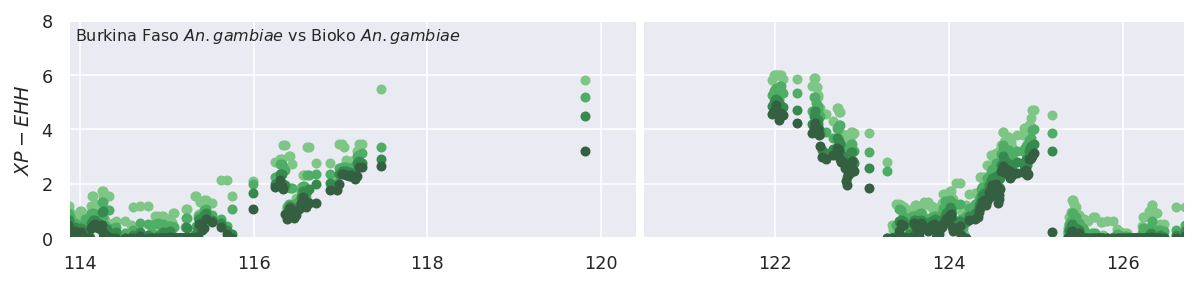

In [212]:
plot_xpehh('bf_gam', 'gq_gam', vgsc.chromosome, vgsc.chromosome_center/1e6, 
         flank=(7, 4), ymax=8, step=1, shift=0, genetic_distance=True)

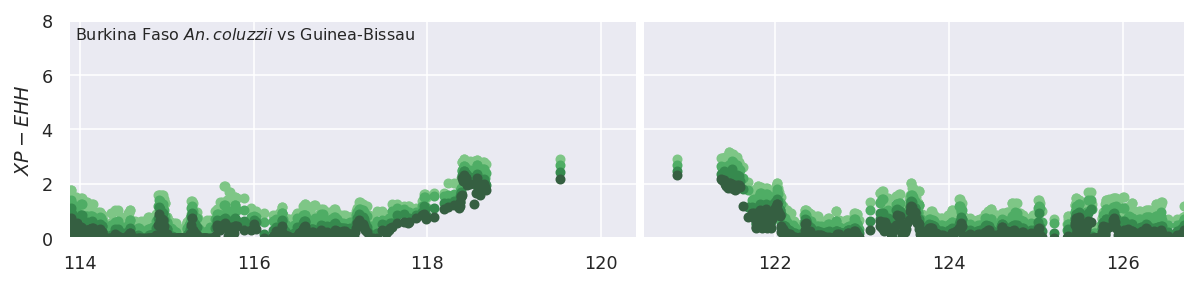

In [213]:
plot_xpehh('bf_col', 'gw', vgsc.chromosome, vgsc.chromosome_center/1e6, 
         flank=(7, 4), ymax=8, step=1, shift=0, genetic_distance=True)

In [214]:
def plot_pbs(pop1, pop2, pop3, chromosome, center, flank, ax=None, 
             markersize=4, window_size=500, window_step=250, 
             step=2, shift=0, label=True, ymax=.4, genetic_distance=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 2), facecolor='w')
        
    # plot center line
    if genetic_distance:
        gcenter = mbp2cm(chromosome, center)
        ax.axvline(gcenter, color='w', linestyle='-', lw=4, zorder=0)
    else:
        ax.axvline(center, color='w', linestyle='-', lw=4, zorder=0)
        
    # figure out x limits
    if isinstance(flank, (int, float)):
        xlim = center - flank, center + flank
    elif isinstance(flank, tuple):
        xlim = center - flank[0], center + flank[1]
    else:
        raise ValueError

    # create colour palette
    palette = sns.color_palette('Purples_d', 3)

    # load data
    windows, gwindows, pbs, pbs_scaled = load_pbs_gwss(
        pop1, pop2, pop3, chromosome, window_size=window_size, window_step=window_step
    )
    
    # plot data
    if genetic_distance:
        x = gwindows.mean(axis=1)
        xlim = mbp2cm(chromosome, xlim[0]), mbp2cm(chromosome, xlim[1])
    else:
        x = windows.mean(axis=1)/1e6
    ax.plot(x[shift::step], pbs[shift::step], marker='o', linestyle=' ', markersize=markersize, 
            color=palette[1])

    # tidy
    ax.set_xlim(*xlim)
    ax.set_ylim(0, ymax)
    ax.set_ylabel('$PBS$')
    if label:
        pop1_label = pop_defs[pop1]["label"]
        pop2_label = pop_defs[pop2]["label"]
        pop3_label = pop_defs[pop3]["label"]
        annotation = (
            f'{pop1_label} vs. {pop2_label}, {pop3_label}'
            .replace("An. gambiae", "$An. gambiae$")
            .replace("An. coluzzii", "$An. coluzzii$")
        )
        ax.annotate(annotation, xy=(0, 1), xycoords='axes fraction', xytext=(3, -3), 
                    textcoords='offset points', fontsize=8, va='top', ha='left')
    

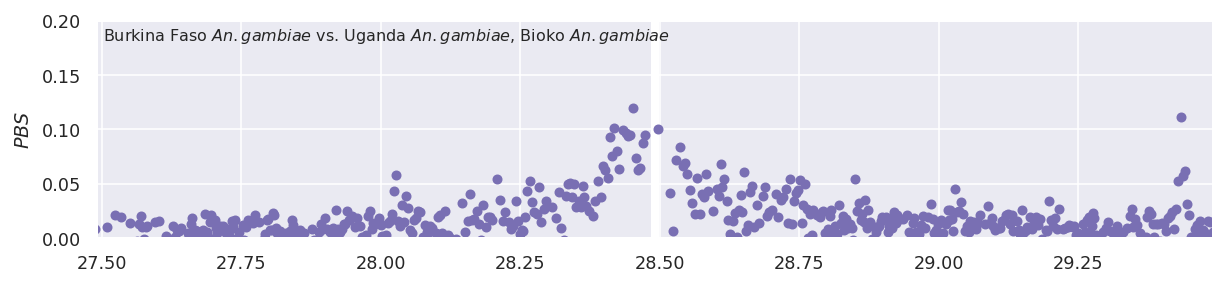

In [215]:
plot_pbs('bf_gam', 'ug_gam', 'gq_gam', cyp6p3.chromosome, cyp6p3.chromosome_center/1e6, 1,
         ymax=.2)

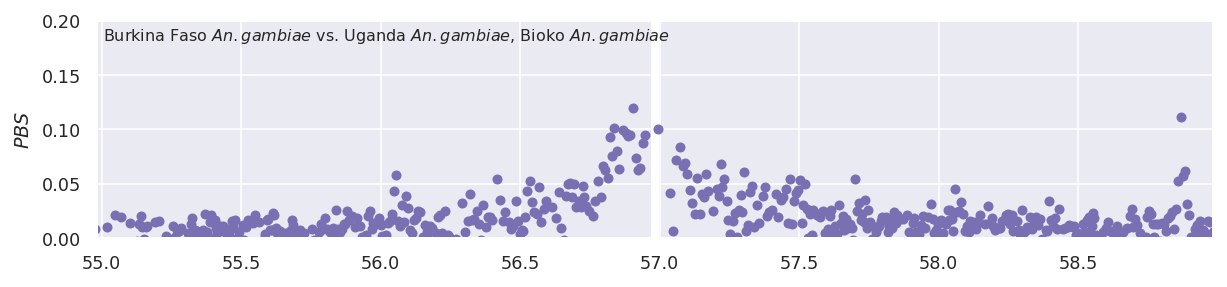

In [216]:
plot_pbs('bf_gam', 'ug_gam', 'gq_gam', cyp6p3.chromosome, cyp6p3.chromosome_center/1e6, 1,
         ymax=.2, genetic_distance=True)

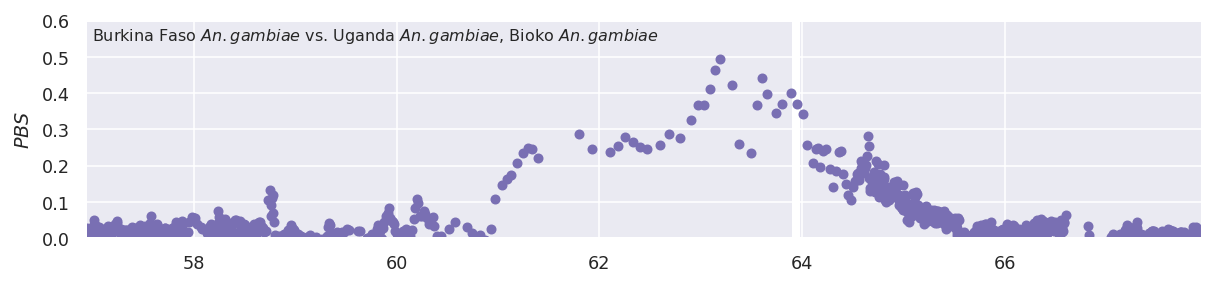

In [217]:
plot_pbs('bf_gam', 'ug_gam', 'gq_gam', vgsc.chromosome, vgsc.chromosome_center/1e6, 
         flank=(7, 4), ymax=.6, step=1, shift=0, genetic_distance=False)

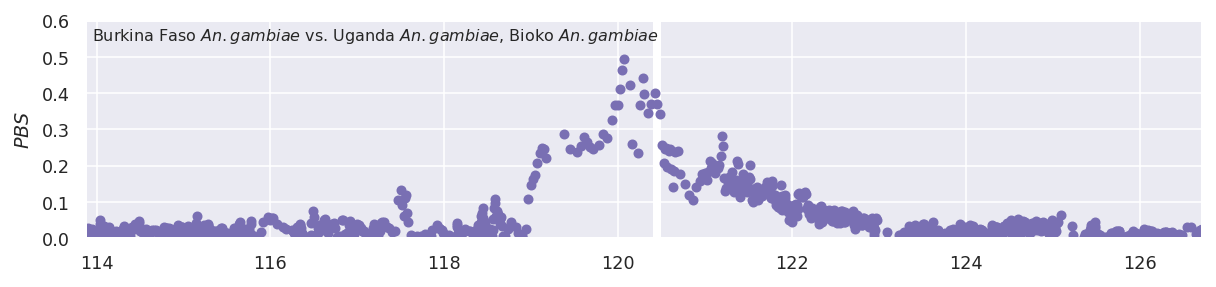

In [218]:
plot_pbs('bf_gam', 'ug_gam', 'gq_gam', vgsc.chromosome, vgsc.chromosome_center/1e6, 
         flank=(7, 4), ymax=.6, step=1, shift=0, genetic_distance=True)

In [219]:
def plot_genes(chromosome, center, flank, label, ax=None, genetic_distance=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 1), facecolor='w')
        
    # plot center line
    if genetic_distance:
        gcenter = mbp2cm(chromosome, center)
        ax.axvline(gcenter, color='w', linestyle='-', lw=4, zorder=0)
    else:
        ax.axvline(center, color='w', linestyle='-', lw=4, zorder=0)
        
    # figure out x limits
    if isinstance(flank, (int, float)):
        xlim = center - flank, center + flank
    elif isinstance(flank, tuple):
        xlim = center - flank[0], center + flank[1]
    else:
        raise ValueError

    # get genes
    df_genes_plot = df_genes.query(f"chromosome == '{chromosome}' and chromosome_start < {xlim[1]*1e6} and chromosome_end > {xlim[0]*1e6}")
    fwd_genes = df_genes_plot.query("strand == '+'")
    rev_genes = df_genes_plot.query("strand == '-'")
    
    # plot genes
    if genetic_distance:
        fwd_limits = [
            (bp2cm(gene.chromosome, gene.chromosome_start),
             bp2cm(gene.chromosome, gene.chromosome_end))
            for _, gene in fwd_genes.iterrows()
        ]
        rev_limits = [
            (bp2cm(gene.chromosome, gene.chromosome_start),
             bp2cm(gene.chromosome, gene.chromosome_end))
            for _, gene in rev_genes.iterrows()            
        ]
        xlim = mbp2cm(chromosome, xlim[0]), mbp2cm(chromosome, xlim[1])
    else:
        fwd_limits = [
            (gene.chromosome_start/1e6, gene.chromosome_end/1e6)
            for _, gene in fwd_genes.iterrows()
        ]
        rev_limits = [
            (gene.chromosome_start/1e6, gene.chromosome_end/1e6)
            for _, gene in rev_genes.iterrows()
        ]
    fwd_xranges = [(a, b-a) for (a, b) in fwd_limits]
    rev_xranges = [(a, b-a) for (a, b) in rev_limits]
    ax.broken_barh(fwd_xranges, (0.6, .3), edgecolor='k', facecolor='w', linewidth=1)
    ax.broken_barh(rev_xranges, (0.1, .3), edgecolor='k', facecolor='w', linewidth=1)

    # tidy
    ax.set_xlim(*xlim)
    ax.set_ylim(0, 1)
    ax.set_yticks([0.25, 0.75])
    ax.set_yticklabels(['reverse', 'forward'])
    ax.set_xticklabels([])
    ax.text(xlim[0], 1, 'Genes', ha='left', va='bottom')
    if genetic_distance:
        annx = mbp2cm(chromosome, center)
    else:
        annx = center
    ax.annotate(label, xy=(annx, 1), xytext=(0, 20), textcoords='offset points',
                ha='center', va='bottom', fontstyle='italic',
                arrowprops=dict(arrowstyle='simple', connectionstyle='arc3', color='k'))


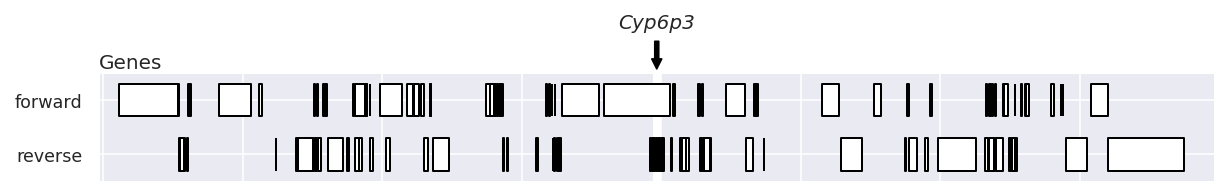

In [220]:
plot_genes(cyp6p3.chromosome, cyp6p3.chromosome_center/1e6, 1, cyp6p3['Name'])

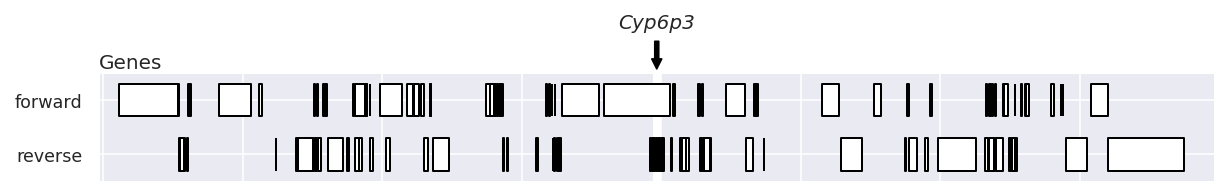

In [221]:
plot_genes(cyp6p3.chromosome, cyp6p3.chromosome_center/1e6, 1, cyp6p3['Name'],
           genetic_distance=True)

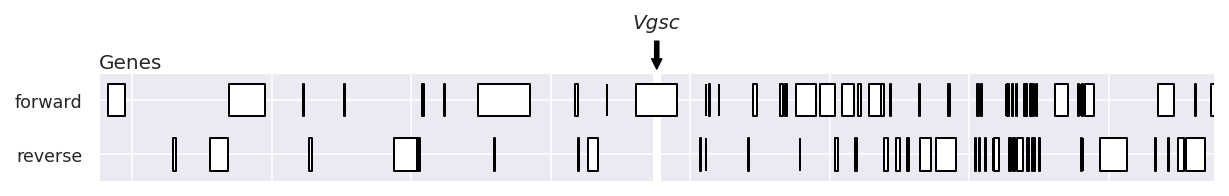

In [222]:
plot_genes(vgsc.chromosome, vgsc.chromosome_center/1e6, 1, vgsc['Name'])

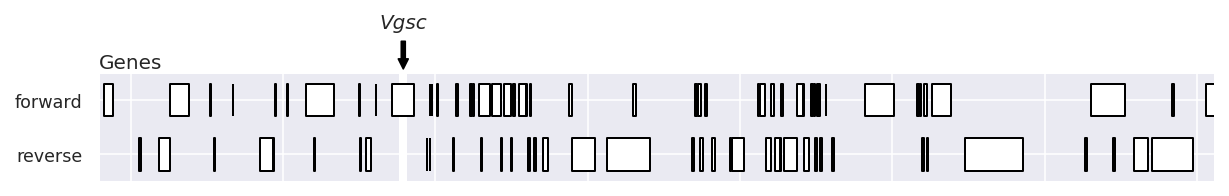

In [223]:
plot_genes(vgsc.chromosome, vgsc.chromosome_center/1e6, 1, vgsc['Name'], genetic_distance=True)

In [224]:
def fig_locus(chromosome, center, flank, label, tracks, figw=10, savefig=None,
              savefig_dpi=150, genetic_distance=False):
    
    figh = .5 + len(tracks) * 2.0

    fig = plt.figure(figsize=(figw, figh), facecolor='w')
    gs = fig.add_gridspec(ncols=1, nrows=1+len(tracks), 
                          height_ratios=[.5] + [2] * len(tracks))
    
    # genes
    ax = fig.add_subplot(gs[0])
    plot_genes(chromosome, center, flank, label, ax=ax, genetic_distance=genetic_distance)
    
    # tracks
    for i, (plot, kwargs) in enumerate(tracks):
        ax = fig.add_subplot(gs[i+1])
        plot(chromosome=chromosome, center=center, flank=flank, ax=ax, 
             genetic_distance=genetic_distance, **kwargs)
        if i < len(tracks) - 1:
            ax.set_xticklabels([])
    if genetic_distance:
        units = 'cM'
    else:
        units = 'Mbp'
    ax.set_xlabel(f"Chromosome {chromosome} position ({units})")
   
    fig.tight_layout()
    
    if savefig:
        fig.savefig(savefig, bbox_inches='tight', dpi=savefig_dpi)
    plt.show()
    plt.close()
    

## *Gste2*

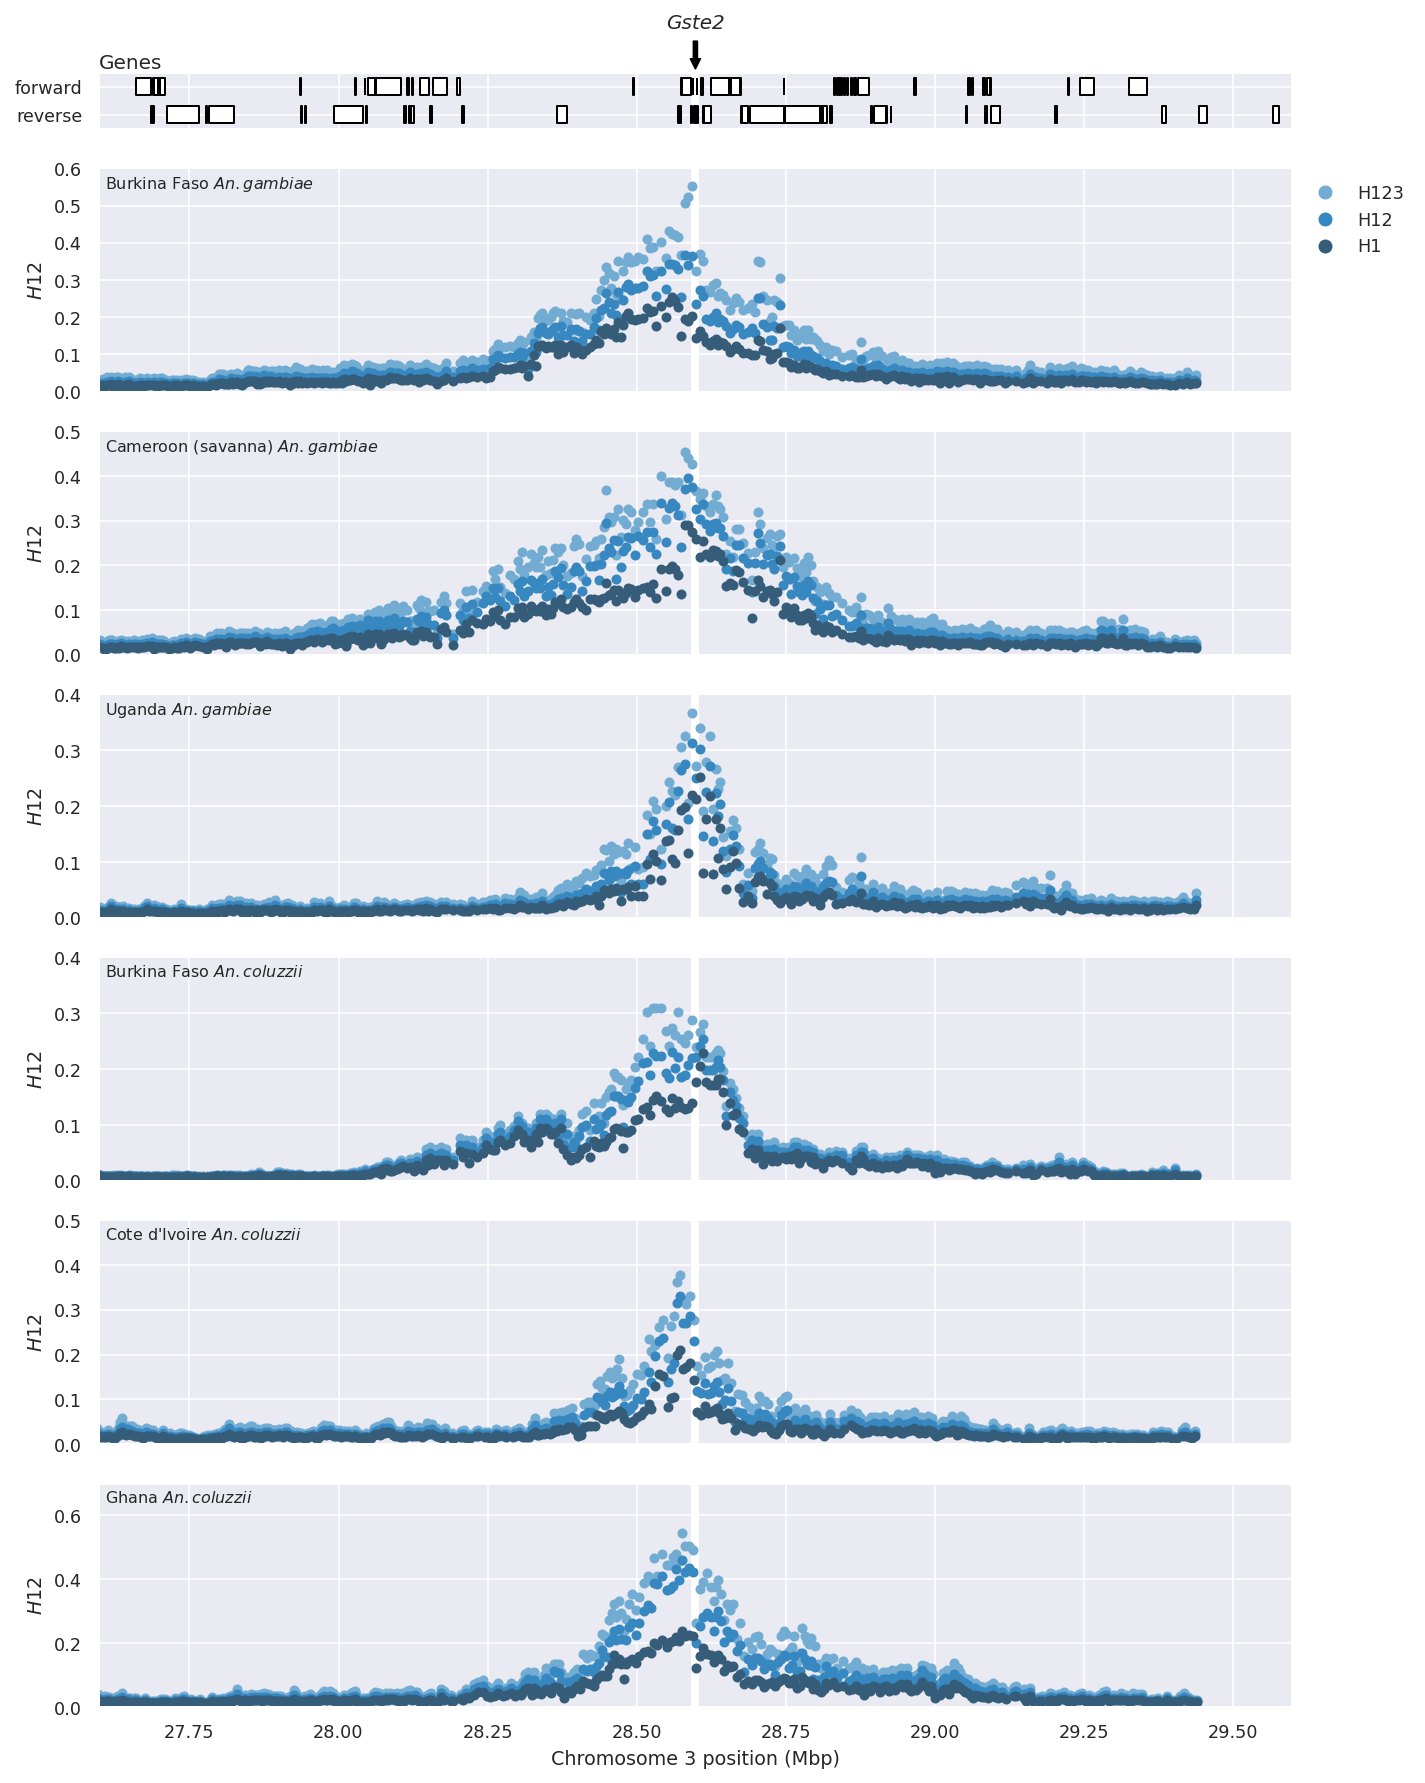

In [225]:
fig_locus(
    chromosome=gste2.chromosome, center=gste2.chromosome_center/1e6, 
    flank=1, label=gste2['Name'],
    tracks=(
        (plot_h12, dict(pop='bf_gam', ymax=.6, step=5, shift=0, legend=True)),
        (plot_h12, dict(pop='cm_sav_gam', ymax=.5, step=5, shift=0)),
        (plot_h12, dict(pop='ug_gam', ymax=.4, step=5, shift=0)),
        (plot_h12, dict(pop='bf_col', ymax=.4, step=5, shift=0)),
        (plot_h12, dict(pop='ci_col', ymax=.5, step=5, shift=0)),
        (plot_h12, dict(pop='gh_col', ymax=.7, step=5, shift=0)),
    ),
    savefig=here() / 'artwork/locus_gste2_h12.png'
)

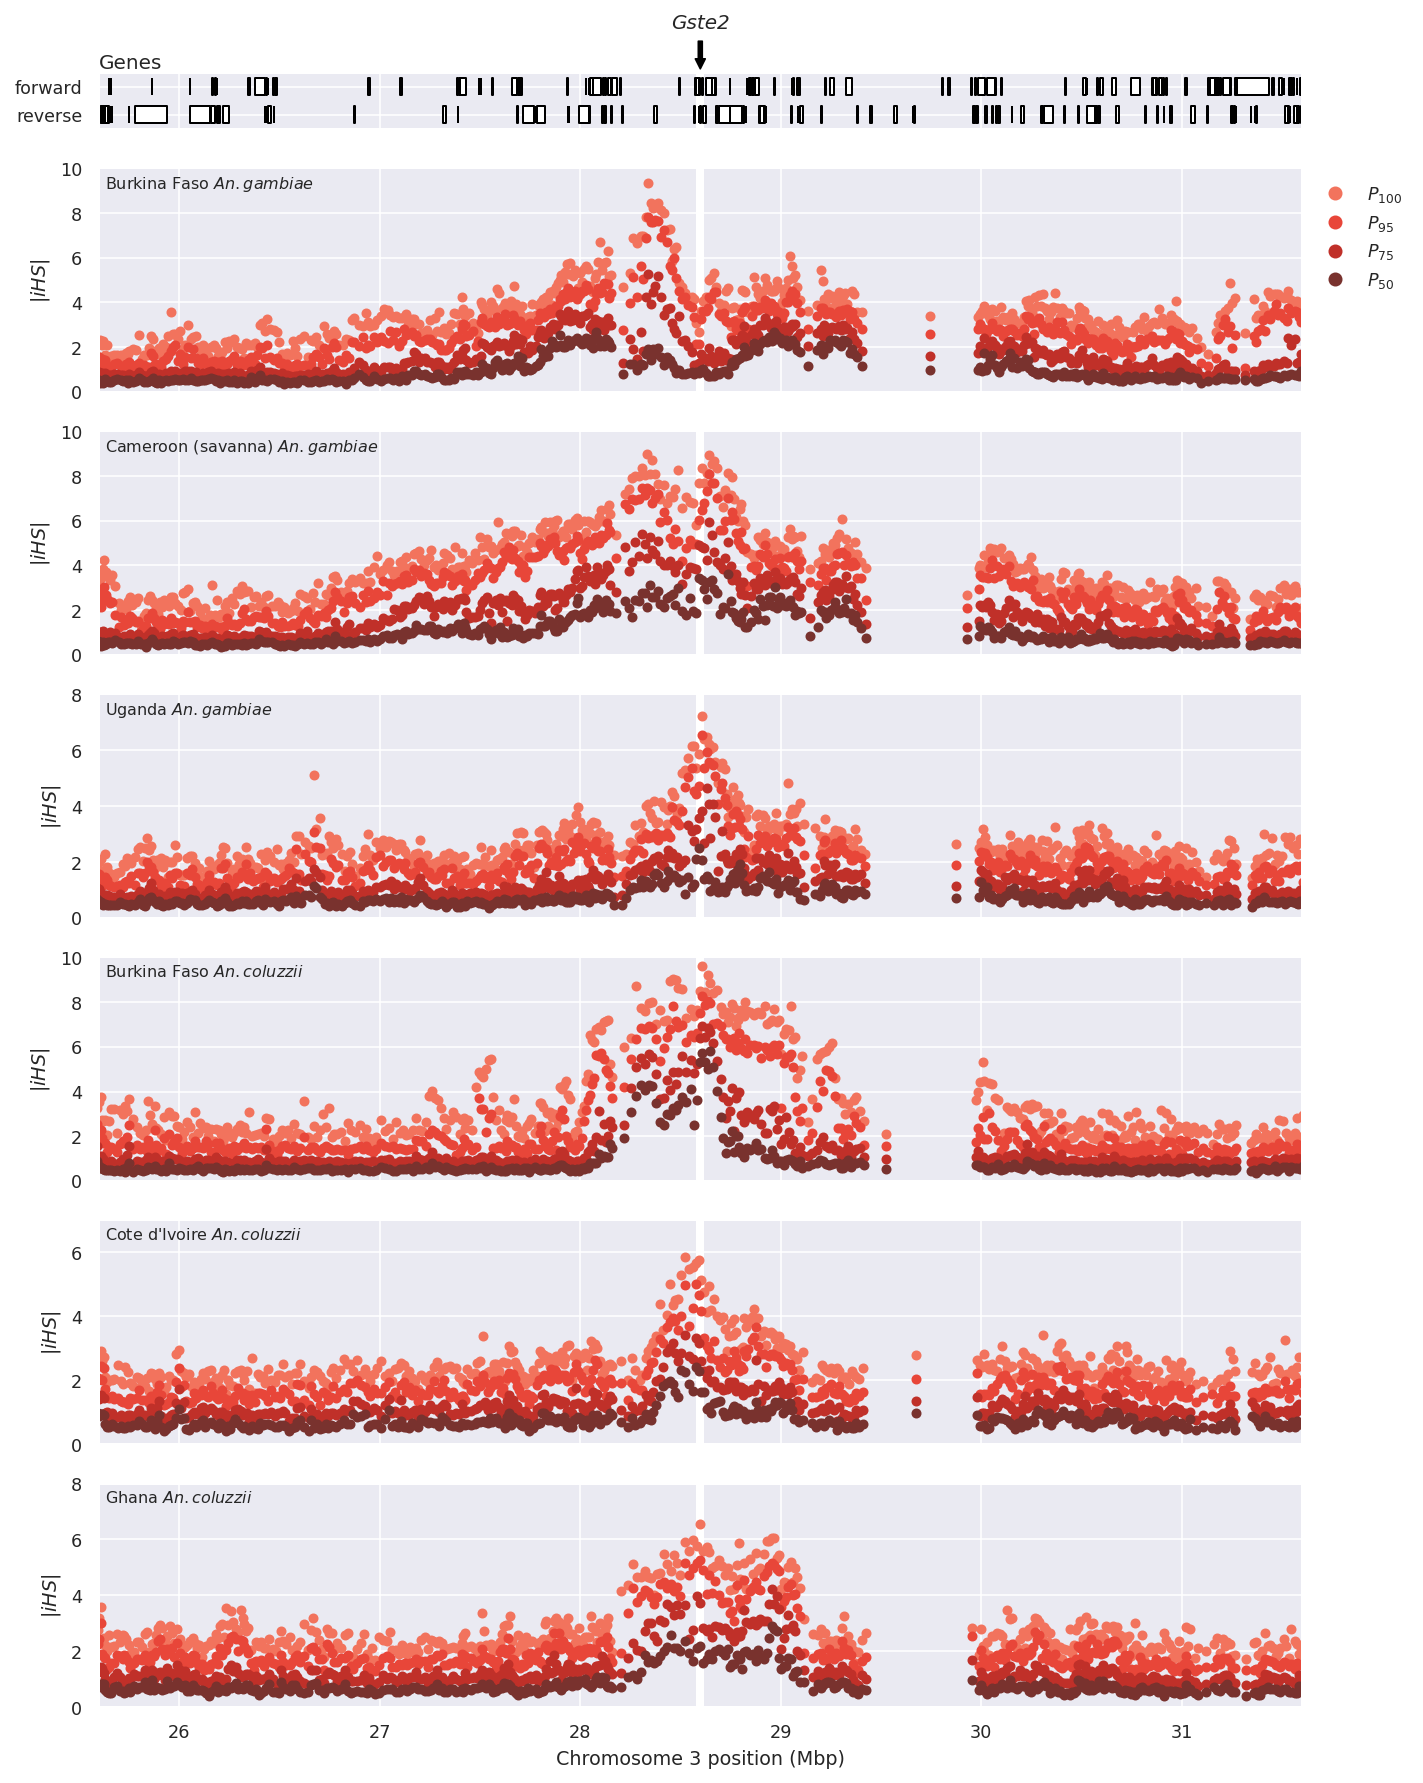

In [226]:
fig_locus(
    chromosome=gste2.chromosome, center=gste2.chromosome_center/1e6, 
    flank=3, label=gste2['Name'],
    tracks=(
        (plot_ihs, dict(pop='bf_gam', ymax=10, step=2, legend=True)),
        (plot_ihs, dict(pop='cm_sav_gam', ymax=10, step=2)),
        (plot_ihs, dict(pop='ug_gam', ymax=8, step=2)),
        (plot_ihs, dict(pop='bf_col', ymax=10, step=2)),
        (plot_ihs, dict(pop='ci_col', ymax=7, step=2)),
        (plot_ihs, dict(pop='gh_col', ymax=8, step=2)),
    ),
    savefig=here() / 'artwork/locus_gste2_ihs.png'
)

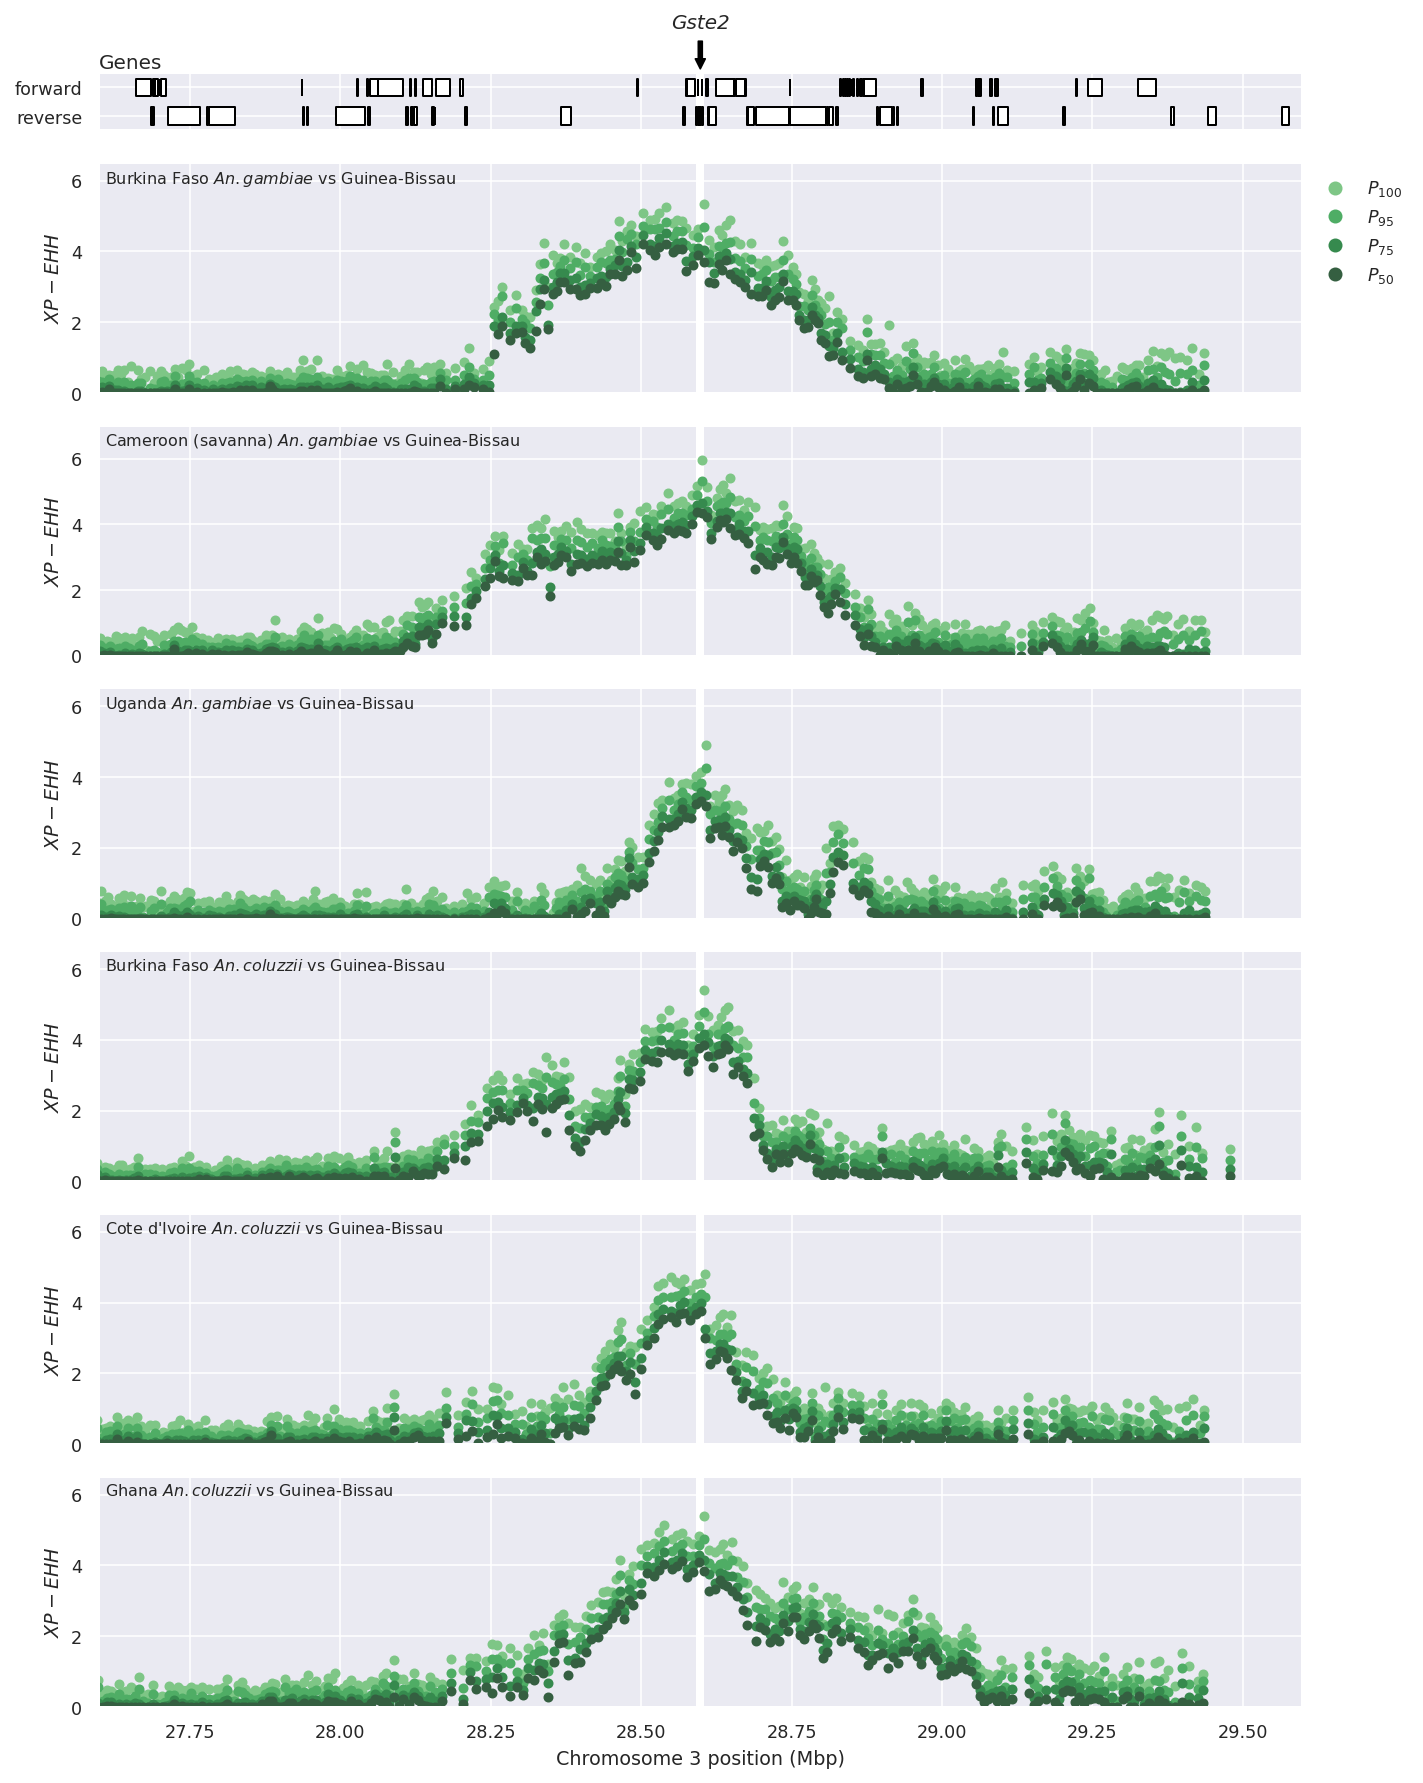

In [227]:
fig_locus(
    chromosome=gste2.chromosome, center=gste2.chromosome_center/1e6, 
    flank=1, label=gste2['Name'],
    tracks=(
        (plot_xpehh, dict(pop1='bf_gam', pop2='gw', ymax=6.5, step=2, legend=True)),
        (plot_xpehh, dict(pop1='cm_sav_gam', pop2='gw', ymax=7, step=2)),
        (plot_xpehh, dict(pop1='ug_gam', pop2='gw', ymax=6.5, step=2)),
        (plot_xpehh, dict(pop1='bf_col', pop2='gw', ymax=6.5, step=2)),
        (plot_xpehh, dict(pop1='ci_col', pop2='gw', ymax=6.5, step=2)),
        (plot_xpehh, dict(pop1='gh_col', pop2='gw', ymax=6.5, step=2)),
    ),
    savefig=here() / 'artwork/locus_gste2_xpehh.png'
)

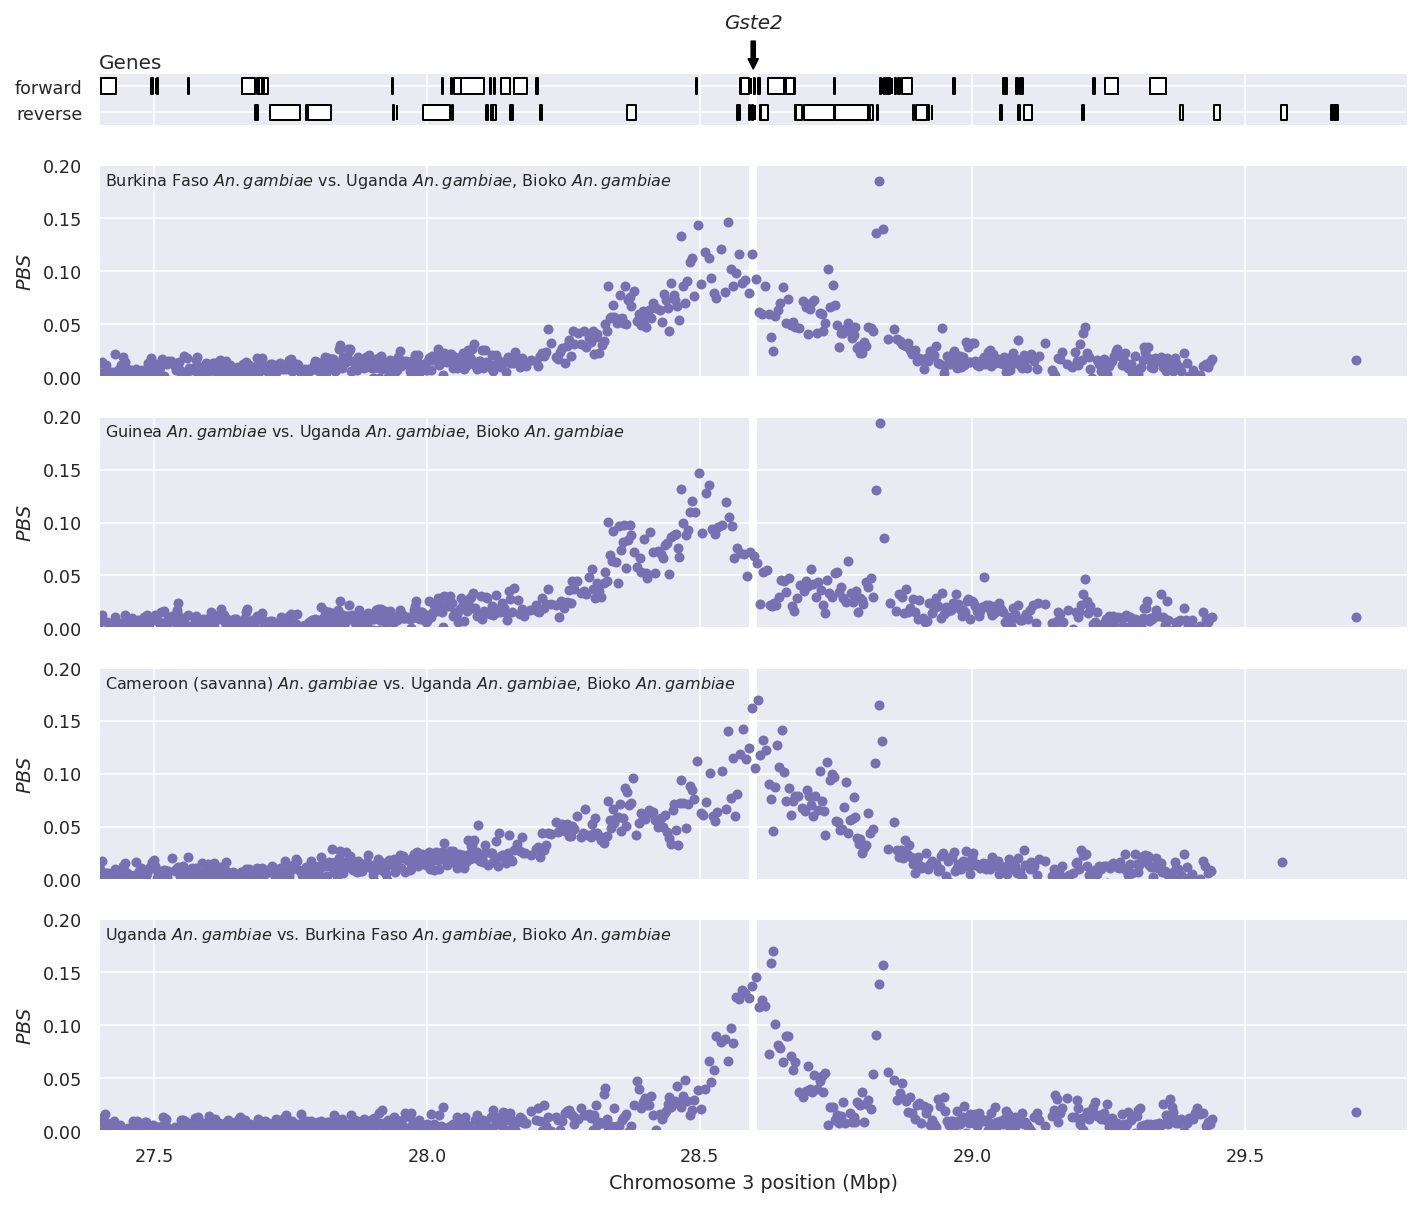

In [228]:
fig_locus(
    chromosome=gste2.chromosome, center=gste2.chromosome_center/1e6, 
    flank=1.2, label=gste2['Name'],
    tracks=(
        (plot_pbs, dict(pop1='bf_gam', pop2='ug_gam', pop3='gq_gam', ymax=.2)),
        (plot_pbs, dict(pop1='gn_gam', pop2='ug_gam', pop3='gq_gam', ymax=.2)),
        (plot_pbs, dict(pop1='cm_sav_gam', pop2='ug_gam', pop3='gq_gam', ymax=.2)),
        (plot_pbs, dict(pop1='ug_gam', pop2='bf_gam', pop3='gq_gam', ymax=.2)),
    ),
    savefig=here() / 'artwork/locus_gste2_pbs.png'
)

## *Cyp6p3*

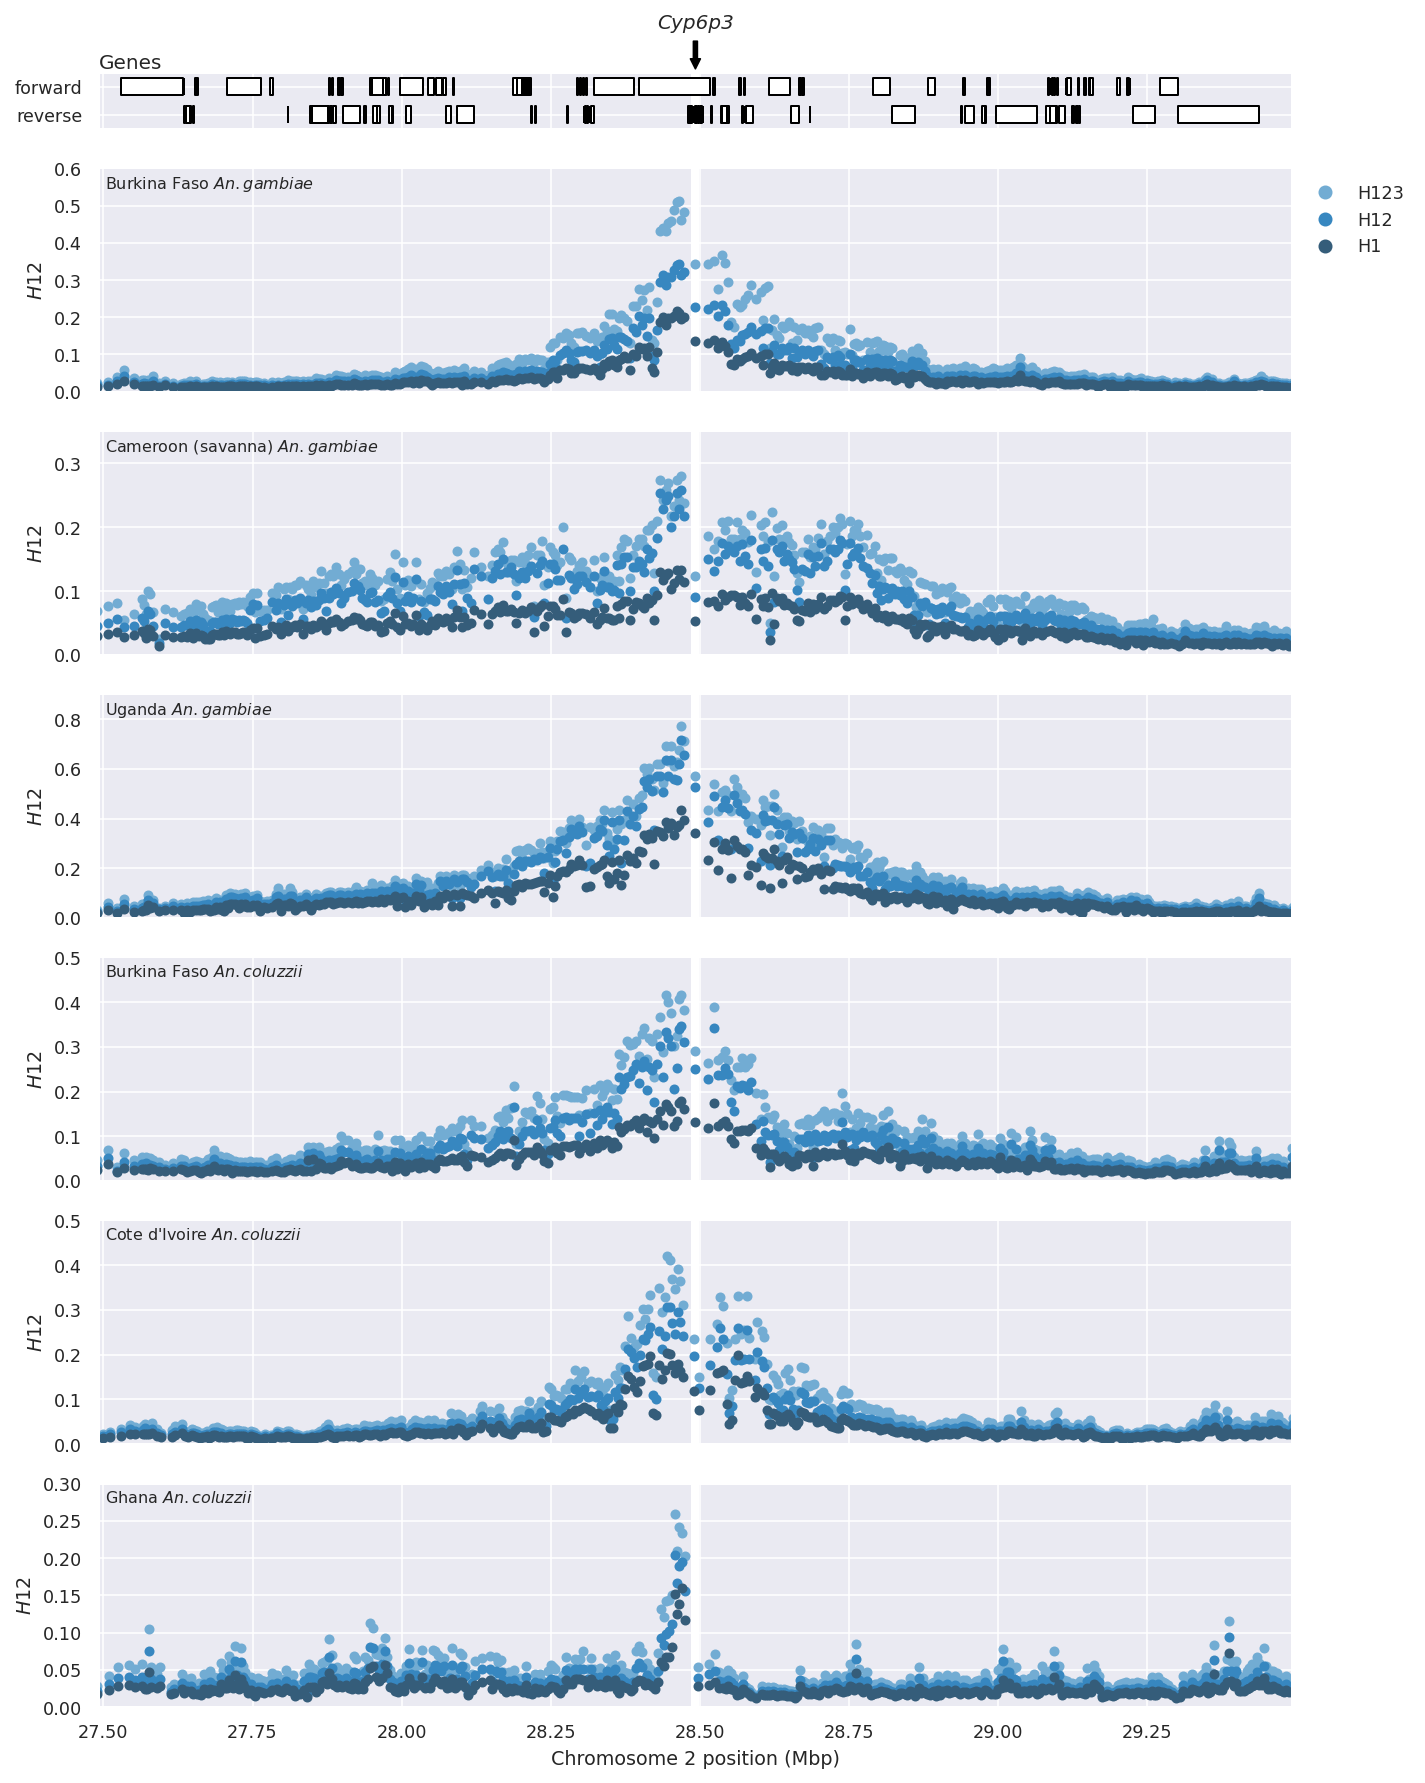

In [229]:
fig_locus(
    chromosome=cyp6p3.chromosome, center=cyp6p3.chromosome_center/1e6, 
    flank=1, label=cyp6p3['Name'],
    tracks=(
        (plot_h12, dict(pop='bf_gam', ymax=.6, step=5, shift=3, legend=True)),
        (plot_h12, dict(pop='cm_sav_gam', ymax=.35, step=5, shift=3)),
        (plot_h12, dict(pop='ug_gam', ymax=.9, step=5, shift=3)),
        (plot_h12, dict(pop='bf_col', ymax=.5, step=5, shift=3)),
        (plot_h12, dict(pop='ci_col', ymax=.5, step=5, shift=3)),
        (plot_h12, dict(pop='gh_col', ymax=.3, step=5, shift=3)),
    ),
    savefig=here() / 'artwork/locus_cyp6p3_h12.png'
)

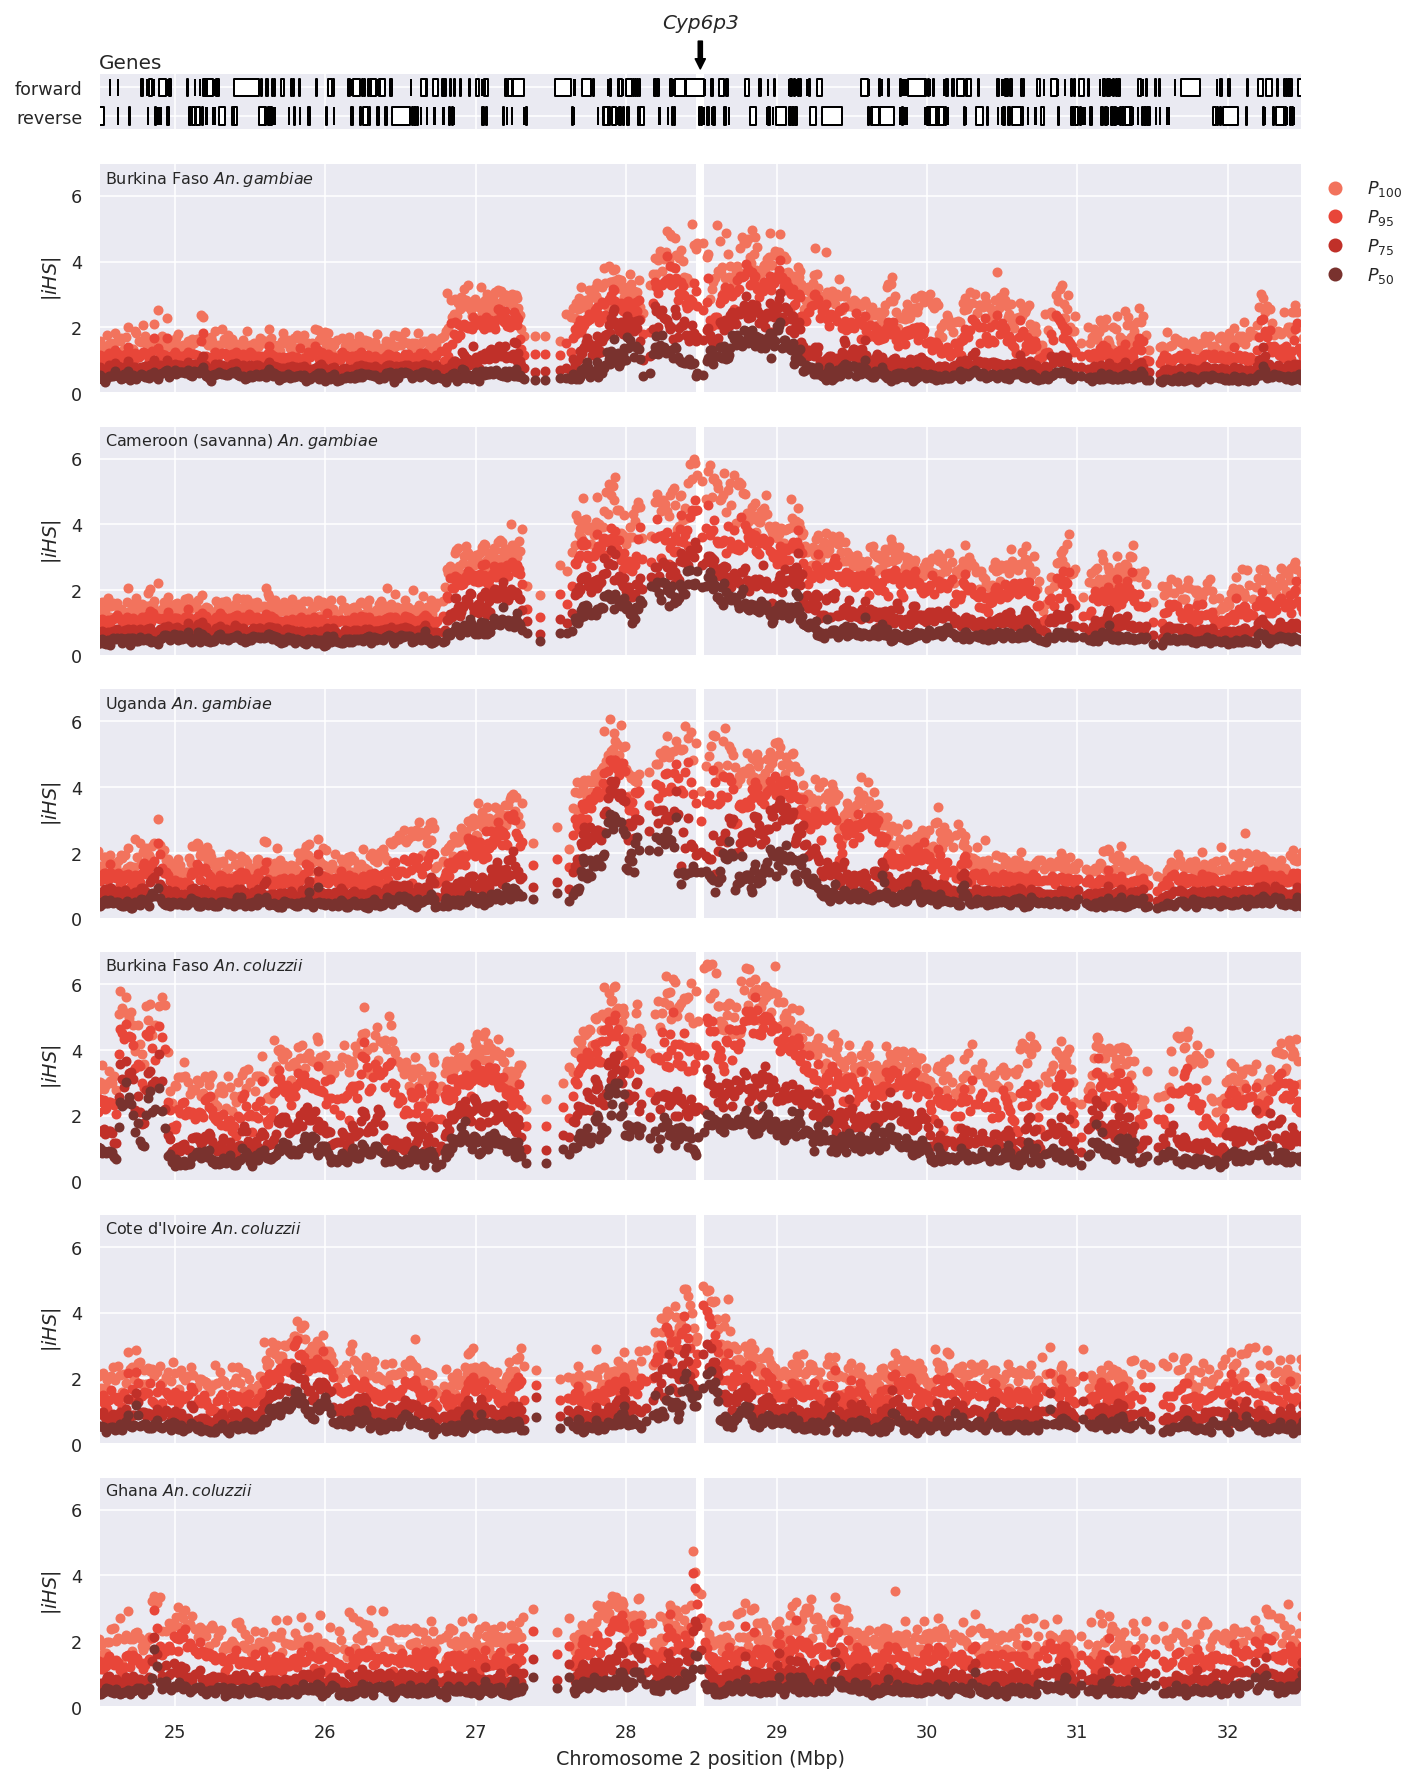

In [230]:
fig_locus(
    chromosome=cyp6p3.chromosome, center=cyp6p3.chromosome_center/1e6, 
    flank=4, label=cyp6p3['Name'],
    tracks=(
        (plot_ihs, dict(pop='bf_gam', ymax=7, step=2, legend=True)),
        (plot_ihs, dict(pop='cm_sav_gam', ymax=7, step=2)),
        (plot_ihs, dict(pop='ug_gam', ymax=7, step=2)),
        (plot_ihs, dict(pop='bf_col', ymax=7, step=2)),
        (plot_ihs, dict(pop='ci_col', ymax=7, step=2)),
        (plot_ihs, dict(pop='gh_col', ymax=7, step=2)),
    ),
    savefig=here() / 'artwork/locus_cyp6p3_ihs.png'
)

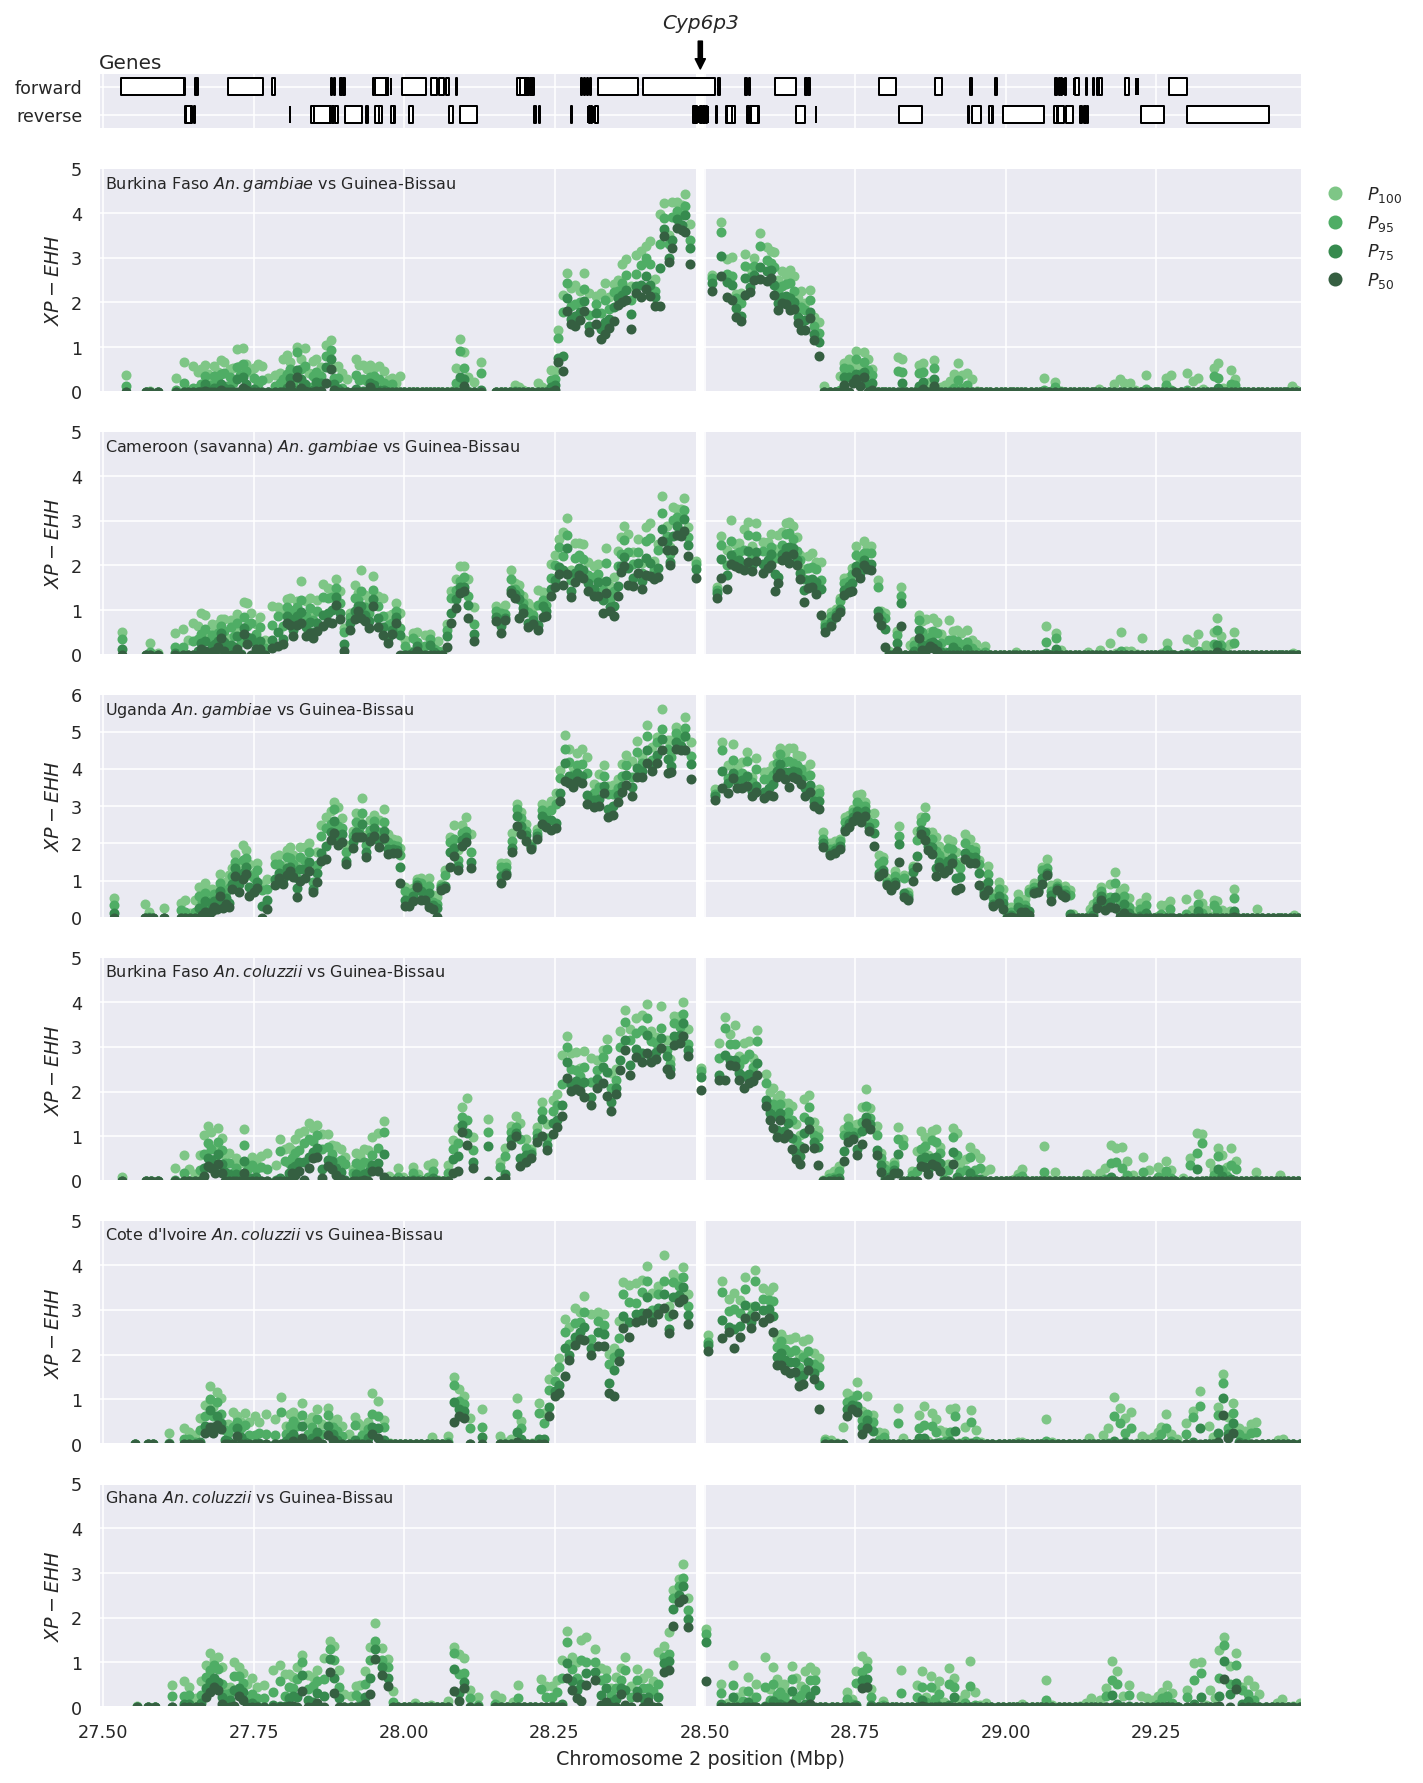

In [231]:
fig_locus(
    chromosome=cyp6p3.chromosome, center=cyp6p3.chromosome_center/1e6, 
    flank=1, label=cyp6p3['Name'],
    tracks=(
        (plot_xpehh, dict(pop1='bf_gam', pop2='gw', ymax=5, step=2, shift=0, legend=True)),
        (plot_xpehh, dict(pop1='cm_sav_gam', pop2='gw', ymax=5, step=2, shift=0)),
        (plot_xpehh, dict(pop1='ug_gam', pop2='gw', ymax=6, step=2, shift=0)),
        (plot_xpehh, dict(pop1='bf_col', pop2='gw', ymax=5, step=2, shift=0)),
        (plot_xpehh, dict(pop1='ci_col', pop2='gw', ymax=5, step=2, shift=0)),
        (plot_xpehh, dict(pop1='gh_col', pop2='gw', ymax=5, step=2, shift=0)),
    ),
    savefig=here() / 'artwork/locus_cyp6p3_xpehh.png'
)

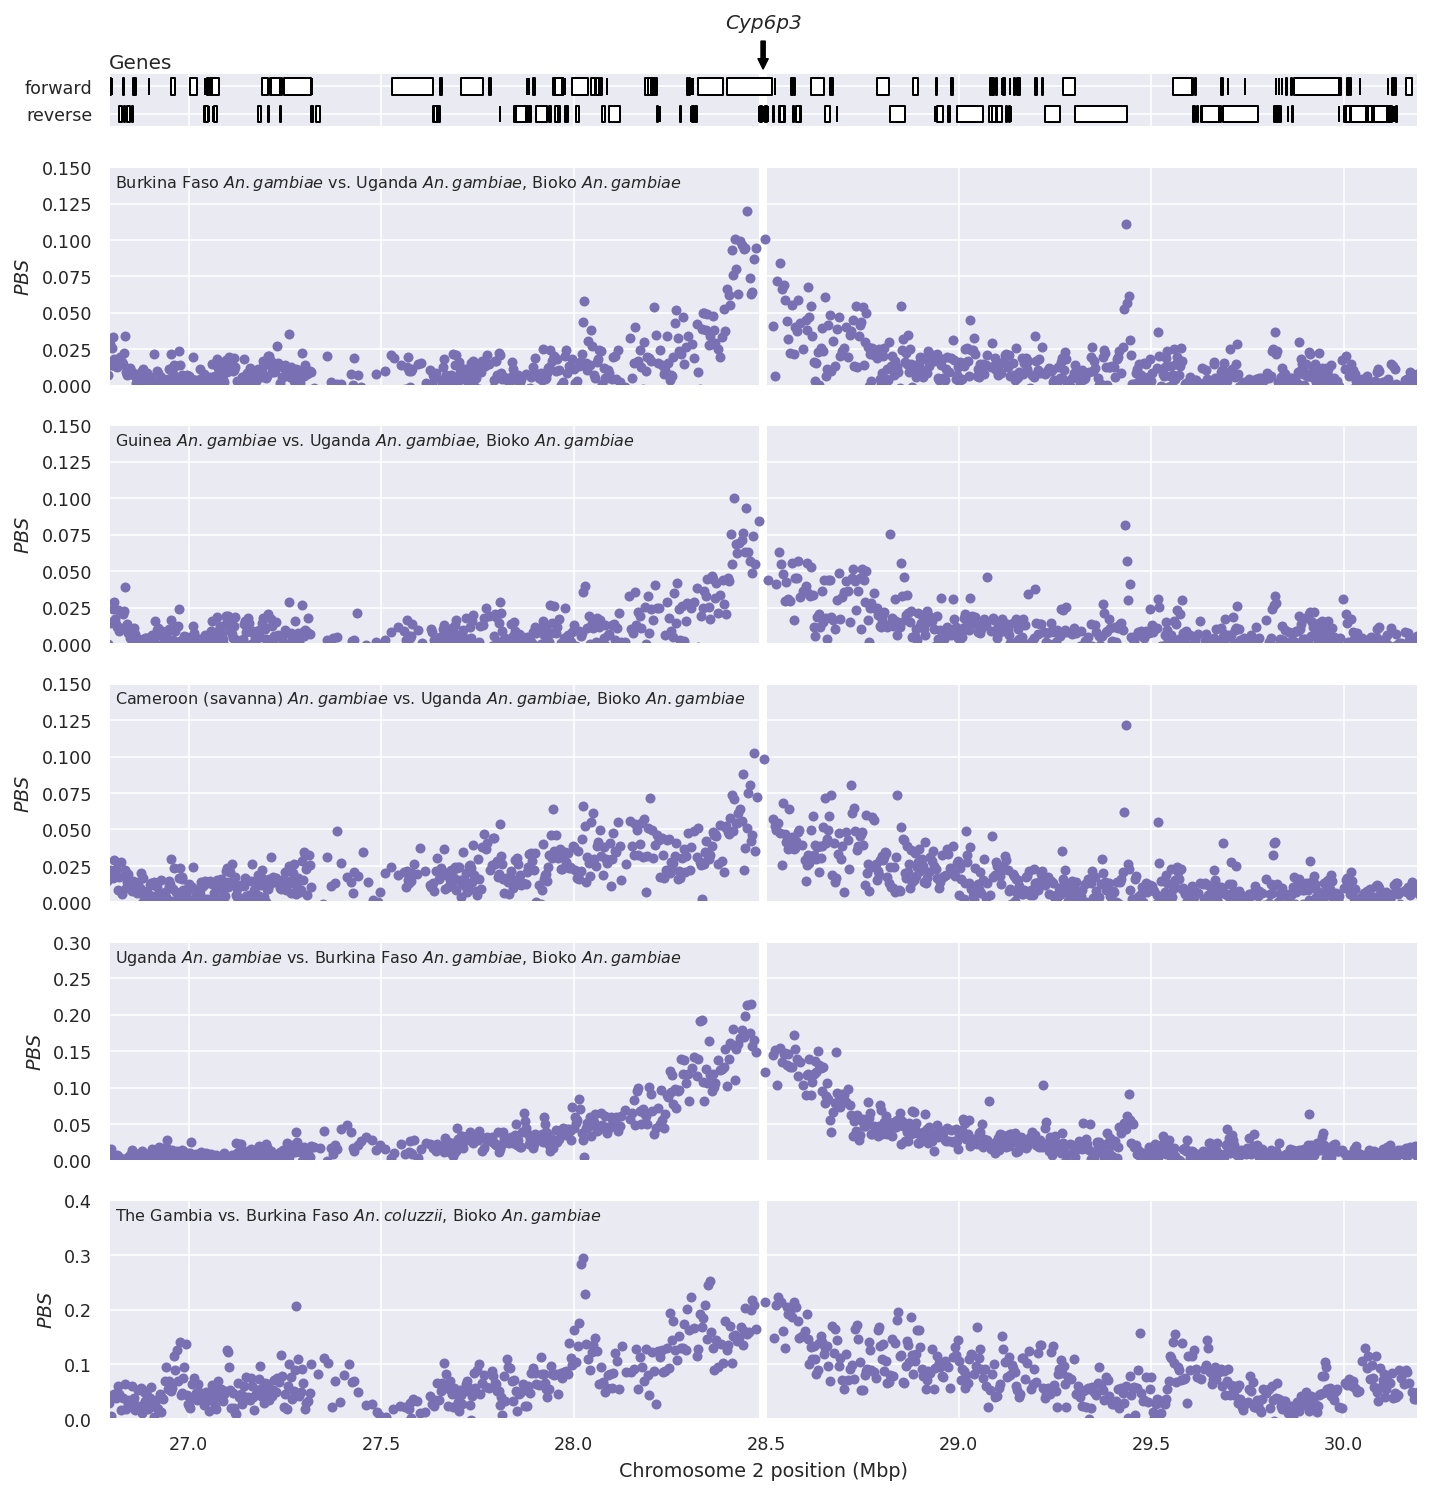

In [232]:
fig_locus(
    chromosome=cyp6p3.chromosome, center=cyp6p3.chromosome_center/1e6, 
    flank=1.7, label=cyp6p3['Name'],
    tracks=(
        (plot_pbs, dict(pop1='bf_gam', pop2='ug_gam', pop3='gq_gam', ymax=.15)),
        (plot_pbs, dict(pop1='gn_gam', pop2='ug_gam', pop3='gq_gam', ymax=.15)),
        (plot_pbs, dict(pop1='cm_sav_gam', pop2='ug_gam', pop3='gq_gam', ymax=.15)),
        (plot_pbs, dict(pop1='ug_gam', pop2='bf_gam', pop3='gq_gam', ymax=.3)),
        (plot_pbs, dict(pop1='gm', pop2='bf_col', pop3='gq_gam', ymax=.4)),
        
    ),
    savefig=here() / 'artwork/locus_cyp6p3_pbs.png'
)

## *Vgsc*

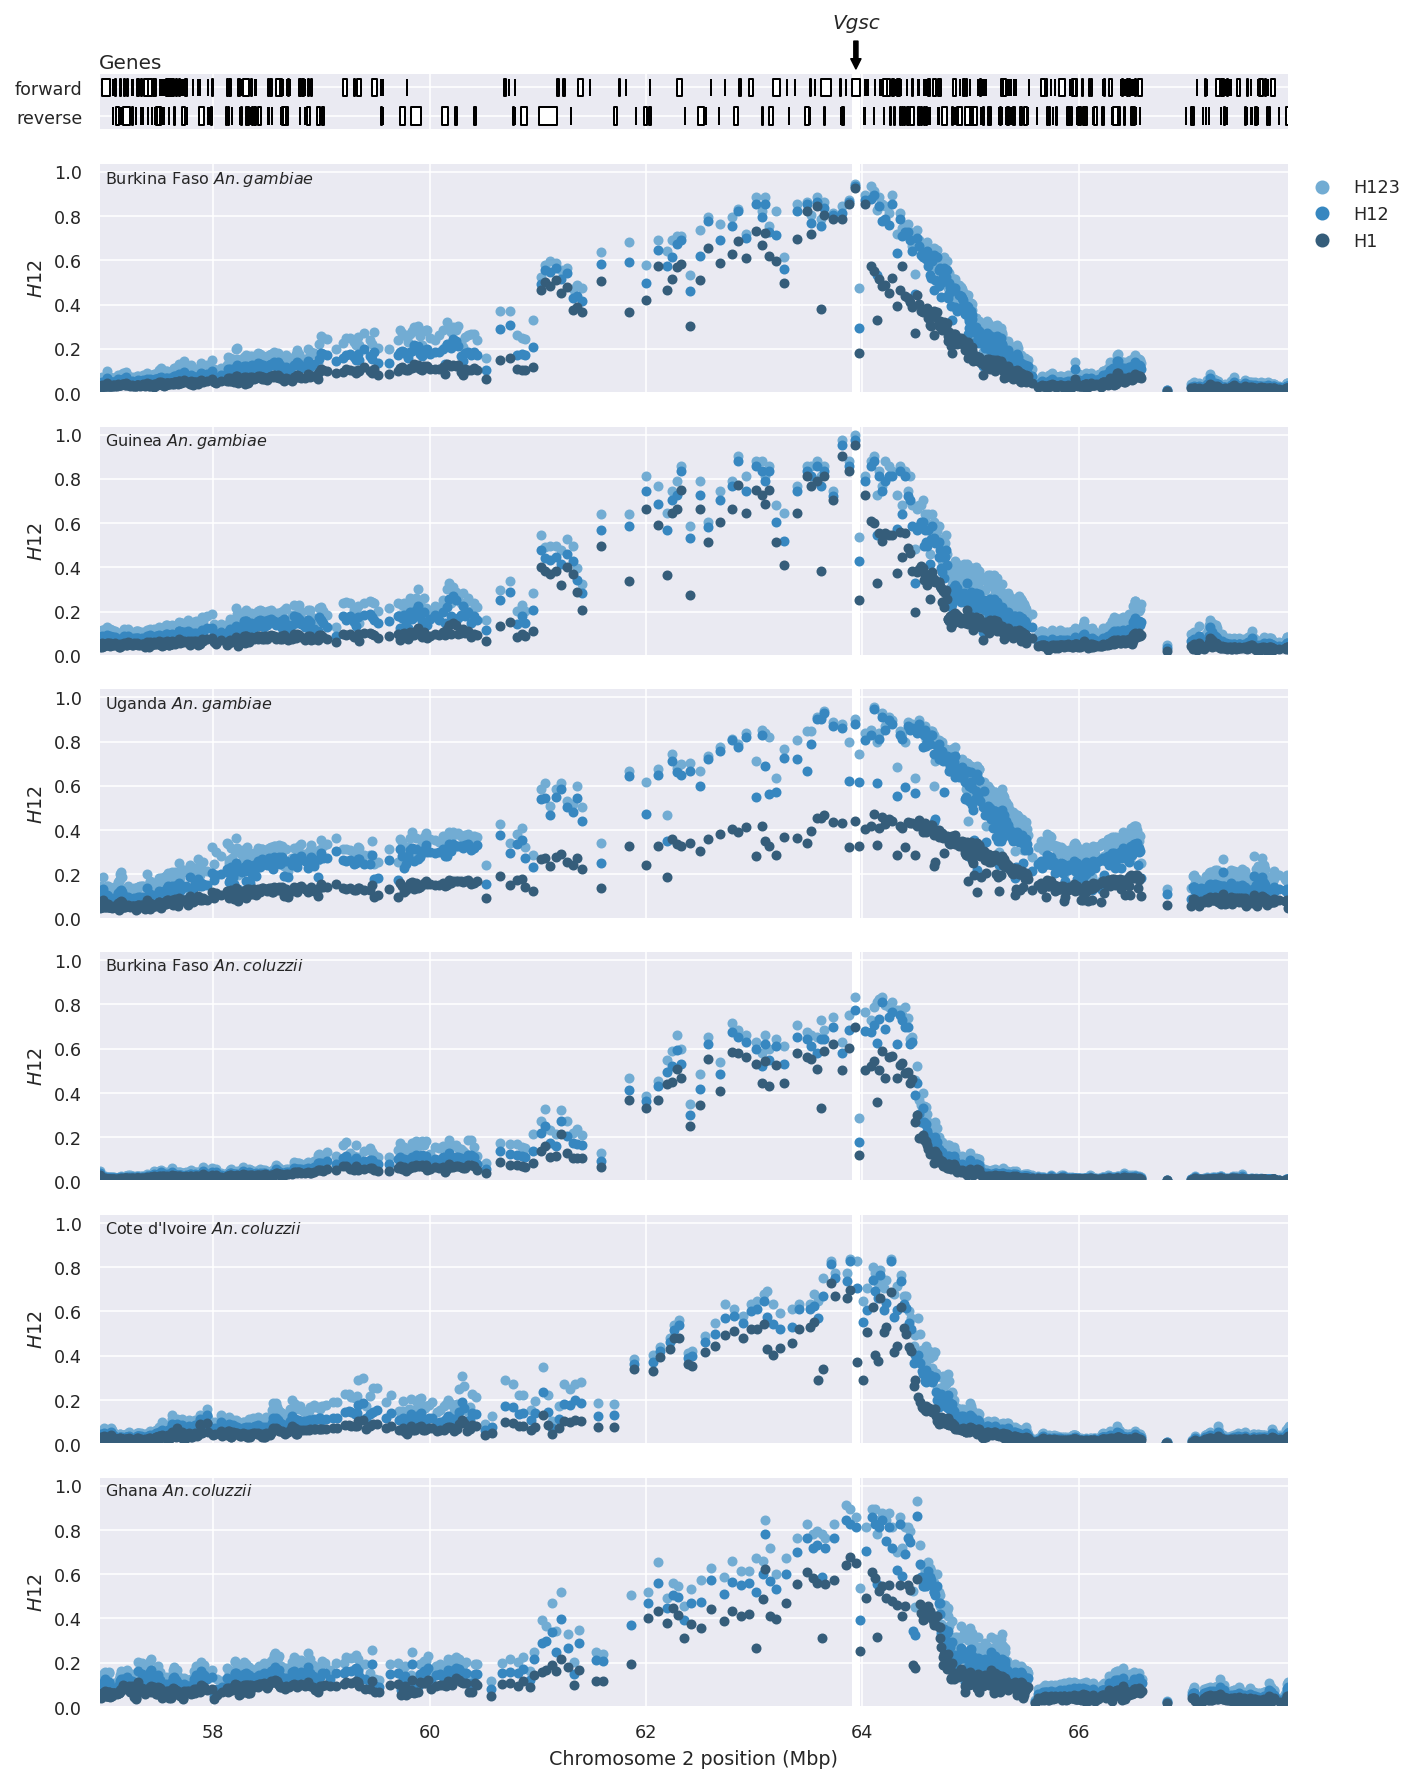

In [242]:
fig_locus(
    chromosome=vgsc.chromosome, center=vgsc.chromosome_center/1e6, 
    flank=(7, 4), label=vgsc['Name'],
    tracks=(
        (plot_h12, dict(pop='bf_gam', ymax=1.04, step=5, shift=3, legend=True)),
        (plot_h12, dict(pop='gn_gam', ymax=1.04, step=5, shift=3)),
        (plot_h12, dict(pop='ug_gam', ymax=1.04, step=5, shift=3)),
        (plot_h12, dict(pop='bf_col', ymax=1.04, step=5, shift=3)),
        (plot_h12, dict(pop='ci_col', ymax=1.04, step=5, shift=3)),
        (plot_h12, dict(pop='gh_col', ymax=1.04, step=5, shift=3)),
    ),
    savefig=here() / 'artwork/locus_vgsc_h12_pdist.png'
)

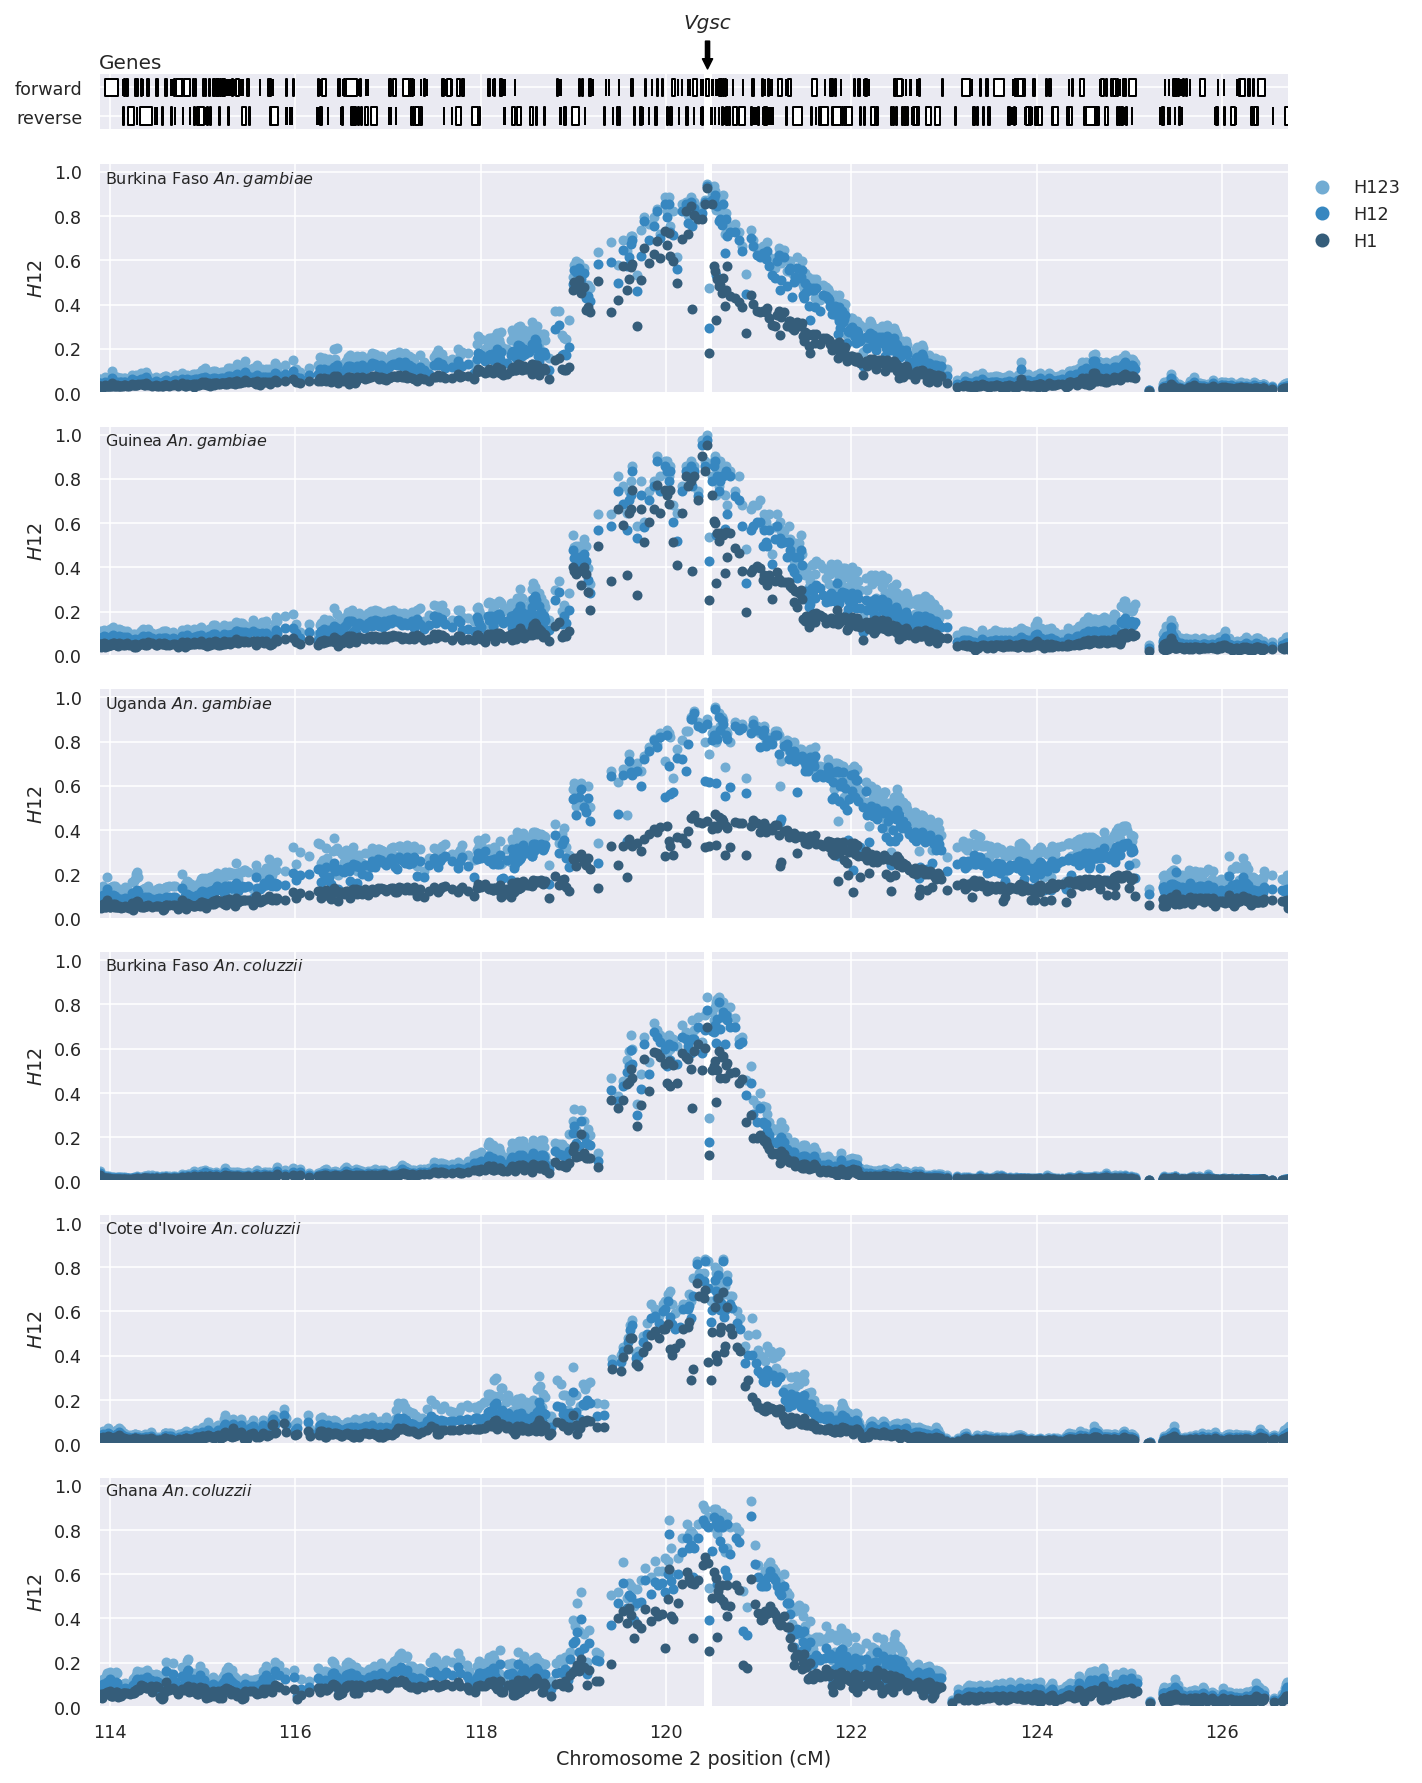

In [243]:
fig_locus(
    chromosome=vgsc.chromosome, center=vgsc.chromosome_center/1e6, 
    flank=(7, 4), label=vgsc['Name'], genetic_distance=True,
    tracks=(
        (plot_h12, dict(pop='bf_gam', ymax=1.04, step=5, shift=3, legend=True)),
        (plot_h12, dict(pop='gn_gam', ymax=1.04, step=5, shift=3)),
        (plot_h12, dict(pop='ug_gam', ymax=1.04, step=5, shift=3)),
        (plot_h12, dict(pop='bf_col', ymax=1.04, step=5, shift=3)),
        (plot_h12, dict(pop='ci_col', ymax=1.04, step=5, shift=3)),
        (plot_h12, dict(pop='gh_col', ymax=1.04, step=5, shift=3)),
    ),
    savefig=here() / 'artwork/locus_vgsc_h12_gdist.png'
)